In [1]:
# load the necessary libraries
from pl_temp_fit import Exp_data_utils, fit_Pl_exp_EMCEE

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [2]:
# if the data are in xlsx format convert them to csv
import pandas as pd
import glob
from scipy import interpolate
def from_xslx_to_csv(csv_name):
    data = pd.read_excel(csv_name)
    hws = np.arange(0.95, 1.8, 0.01)
    y = np.zeros((hws.size, len(data.values[0,:])))
    y[:,0] = hws
    for i in range(1,len(data.values[0,:])):
        f = interpolate.interp1d(data.values[1:,0], data.values[1:,i], axis=0, fill_value='extrapolate')
        y[:,i] = f(hws)
    data = pd.DataFrame(y, columns=data.columns,index=None)  
    data = data.transpose()
    data = data.rename(columns=data.iloc[0])[1:]
    if data.shape[0]>8:
        data = data.iloc[range(0,data.shape[0],2),:]
    data.to_csv(f'{csv_name.replace(".xlsx",".csv")}')
    return f'{csv_name.replace(".xlsx",".csv")}'
xlsx_files = glob.glob('experiemental_data/2023-12-12-Lowtemp-PL/*.xlsx')
for xlsx_file in xlsx_files:
    csv_name = from_xslx_to_csv(xlsx_file)
    print(csv_name)


experiemental_data/2023-12-12-Lowtemp-PL/IDTBR.csv
experiemental_data/2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
experiemental_data/2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal.csv
experiemental_data/2023-12-12-Lowtemp-PL/IT4F.csv
experiemental_data/2023-12-12-Lowtemp-PL/L8BO.csv
experiemental_data/2023-12-12-Lowtemp-PL/ITIC_no_anneal.csv
experiemental_data/2023-12-12-Lowtemp-PL/ITIC.csv
experiemental_data/2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv
experiemental_data/2023-12-12-Lowtemp-PL/Y6-DIO.csv
experiemental_data/2023-12-12-Lowtemp-PL/IEICO4F.csv
experiemental_data/2023-12-12-Lowtemp-PL/IT4F-DIO.csv
experiemental_data/2023-12-12-Lowtemp-PL/GSISO.csv
experiemental_data/2023-12-12-Lowtemp-PL/IEICO-cn.csv
experiemental_data/2023-12-12-Lowtemp-PL/PYIT.csv
experiemental_data/2023-12-12-Lowtemp-PL/IDTBR-DIB.csv
experiemental_data/2023-12-12-Lowtemp-PL/Y6-DIB.csv
experiemental_data/2023-12-12-Lowtemp-PL/ITIC-DIO.csv
experiemental_data/2023-12-12-Lowtemp-PL/IEICO4F-DIO.csv
experiemental_dat

In [3]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('experiemental_data/2023-12-12-Lowtemp-PL/*.csv')
for id,csv_file in enumerate(csv_files):
    print(id,csv_file)



0 experiemental_data/2023-12-12-Lowtemp-PL/IT4F.csv
1 experiemental_data/2023-12-12-Lowtemp-PL/PYIT.csv
2 experiemental_data/2023-12-12-Lowtemp-PL/IDTBR-DIB.csv
3 experiemental_data/2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv
4 experiemental_data/2023-12-12-Lowtemp-PL/Y5-DIO.csv
5 experiemental_data/2023-12-12-Lowtemp-PL/L8BO.csv
6 experiemental_data/2023-12-12-Lowtemp-PL/Y6-DIO.csv
7 experiemental_data/2023-12-12-Lowtemp-PL/ITIC_no_anneal.csv
8 experiemental_data/2023-12-12-Lowtemp-PL/Y5.csv
9 experiemental_data/2023-12-12-Lowtemp-PL/IEICO-cn.csv
10 experiemental_data/2023-12-12-Lowtemp-PL/GSISO.csv
11 experiemental_data/2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
12 experiemental_data/2023-12-12-Lowtemp-PL/Y6-DIB.csv
13 experiemental_data/2023-12-12-Lowtemp-PL/IDTBR.csv
14 experiemental_data/2023-12-12-Lowtemp-PL/IT4F-DIO.csv
15 experiemental_data/2023-12-12-Lowtemp-PL/ITIC.csv
16 experiemental_data/2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal_test.csv
17 experiemental_data/2023-12-12-Lo

experiemental_data/2023-12-12-Lowtemp-PL/IEICO.csv


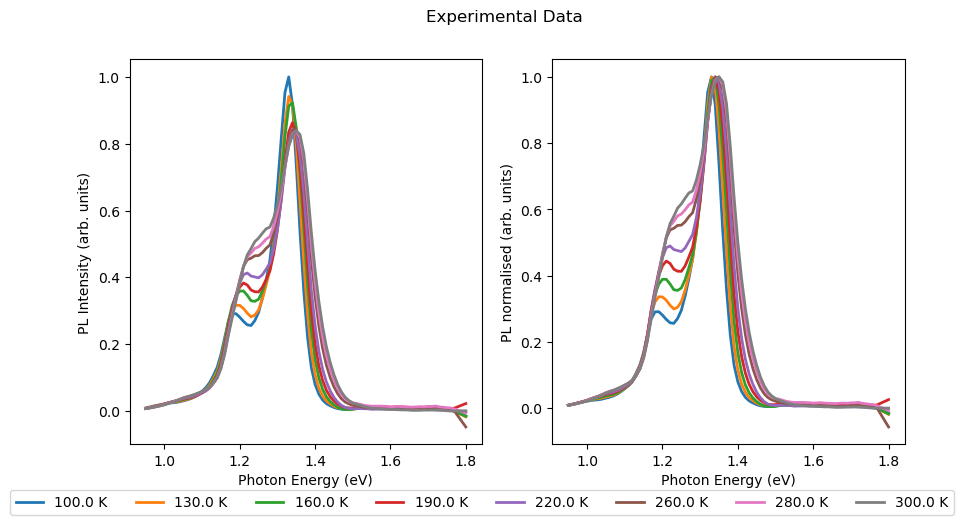

In [4]:
csv_name=csv_files[19]#18,10,14
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)

fig,ax = Exp_data_utils.plot_pl_data(Exp_data, temperature_list, hws,title="Experimental Data")

In [5]:
#initialise parameters for the model
number_free_parameters , sigma, Temp_std_err, hws_std_err, relative_intensity_std_error = 5, 0.001, 5, 0.005, 0.05
num_samples = 1000
num_tune = 1000

model_config = {
            "number_free_parameters": number_free_parameters,
            "sigma": sigma,
            "Temp_std_err": Temp_std_err,
            "hws_std_err": hws_std_err,
            "relative_intensity_std_error": relative_intensity_std_error,
        }
X = {'temperature_list':temperature_list, 'hws':hws}
date=datetime.datetime.now().strftime("%Y_%m_%d")
# generate the data
save_folder = (
    f"fit_experimental_emcee/{date}/{csv_name.replace('.csv','').split('/')[-1]}/"
    + "sigma=" + str(sigma)
    + "_temperature_list=" + str(len(temperature_list))
    + "_number_free_parameters=" + str(number_free_parameters)
    + "_Temp_std_err="+str(Temp_std_err)
    + "_hws_std_err="+str(hws_std_err)
   # + "_relative_intensity_std_error="+str(relative_intensity_std_error)
)
os.makedirs(save_folder, exist_ok=True)

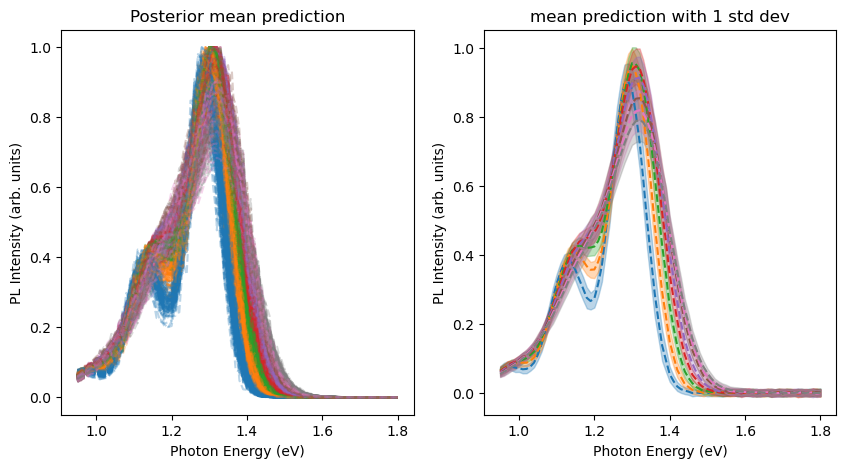

In [6]:
import importlib
importlib.reload(fit_Pl_exp_EMCEE)
#get covariance matrix for the experimental data
init_params = [hws[np.argmax(Exp_data[:,0])]+0.1, 0.02, 0.1, 0.1, 0.16]
co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, save_folder, model_config, savefig=True,true_parameters=init_params)

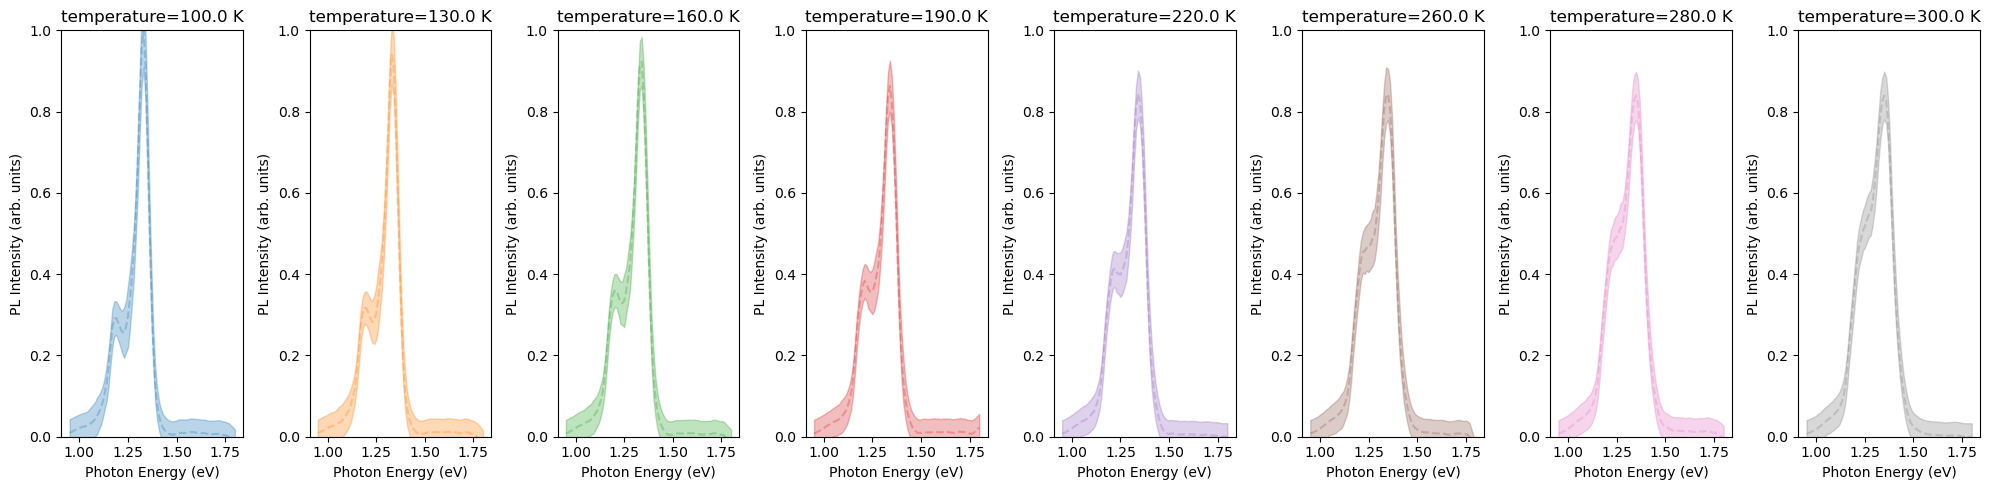

In [15]:
# add noise to the data and plot it
importlib.reload(Exp_data_utils)
variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
fig,axis = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, save_folder)


In [16]:
# get maximum likelihood estimate
soln = fit_Pl_exp_EMCEE.get_maximum_likelihood_estimate(Exp_data, co_var_mat,X,save_folder,init_params=init_params)

[1.39344145 0.01700498 0.07400172 0.04084599 0.12946335]
Maximum likelihood estimates:
  E = 1.393
  sigma = 0.017
  LI = 0.074
  L0 = 0.041
  H0 = 0.129
Maximum log likelihood: 217.06967223024233


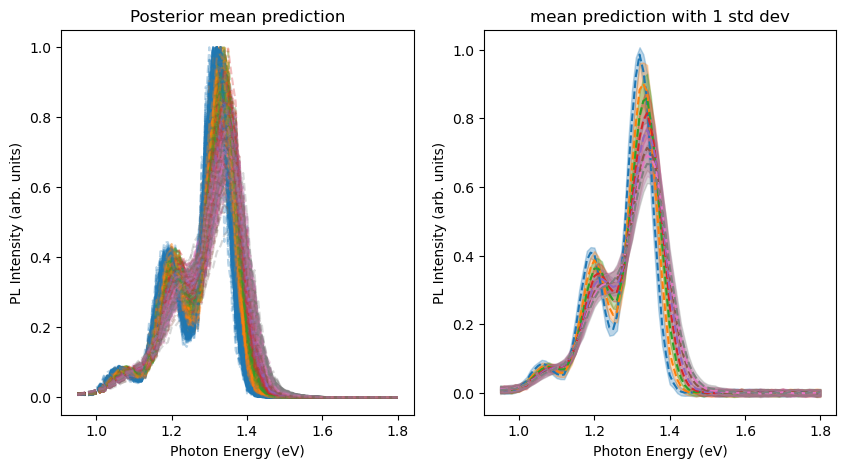

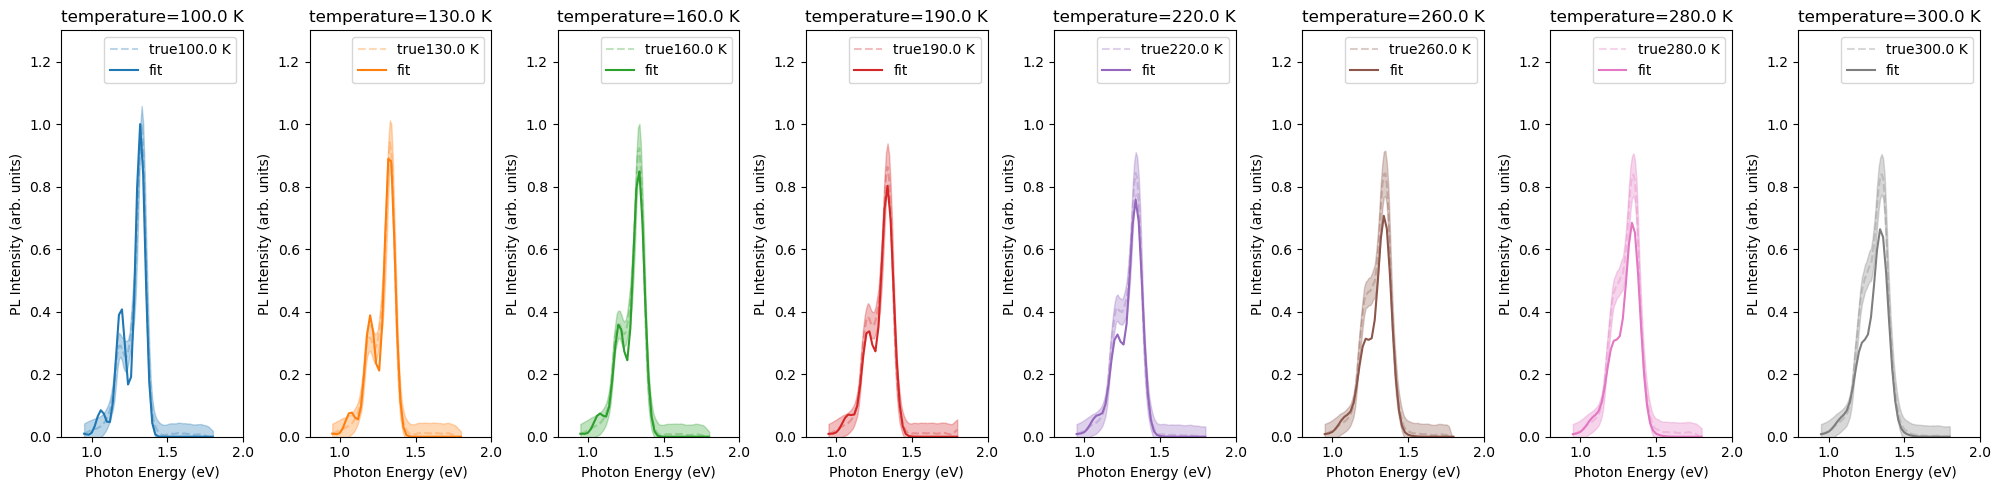

In [21]:
# add noise to the data and plot it now with the fitted parameters
#co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, save_folder, model_config, savefig=False, true_parameters=soln.x)
#variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
#fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, save_folder)
truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( soln.x, temperature_list, hws   ) 
truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, "", model_config, savefig=False, true_parameters=soln.x)
variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, "")
for i,axes  in enumerate(ax): 
    axes.plot(hws,truemodel_pl[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.3)
    axes.set_xlim(0.8,2)

In [26]:
import importlib
importlib.reload(fit_Pl_exp_EMCEE)

sampler = fit_Pl_exp_EMCEE.run_sampler_single(save_folder, soln, Exp_data, co_var_mat, X,nsteps =10)

Initial size: 0


100%|██████████| 10/10 [00:47<00:00,  4.71s/it]

single process took 51.6 seconds


## submitting jobs to the hpc


In [27]:
# submit to HPC
import glob
csv_files = glob.glob('experiemental_data/2023-12-12-Lowtemp-PL/*.csv')
for id,csv_file in enumerate(csv_files):
    print(id,csv_file)


0 experiemental_data/2023-12-12-Lowtemp-PL/IT4F.csv
1 experiemental_data/2023-12-12-Lowtemp-PL/PYIT.csv
2 experiemental_data/2023-12-12-Lowtemp-PL/IDTBR-DIB.csv
3 experiemental_data/2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv
4 experiemental_data/2023-12-12-Lowtemp-PL/Y5-DIO.csv
5 experiemental_data/2023-12-12-Lowtemp-PL/L8BO.csv
6 experiemental_data/2023-12-12-Lowtemp-PL/Y6-DIO.csv
7 experiemental_data/2023-12-12-Lowtemp-PL/ITIC_no_anneal.csv
8 experiemental_data/2023-12-12-Lowtemp-PL/Y5.csv
9 experiemental_data/2023-12-12-Lowtemp-PL/IEICO-cn.csv
10 experiemental_data/2023-12-12-Lowtemp-PL/GSISO.csv
11 experiemental_data/2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
12 experiemental_data/2023-12-12-Lowtemp-PL/Y6-DIB.csv
13 experiemental_data/2023-12-12-Lowtemp-PL/IDTBR.csv
14 experiemental_data/2023-12-12-Lowtemp-PL/IT4F-DIO.csv
15 experiemental_data/2023-12-12-Lowtemp-PL/ITIC.csv
16 experiemental_data/2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal_test.csv
17 experiemental_data/2023-12-12-Lo

experiemental_data/2023-12-12-Lowtemp-PL/IEICO.csv


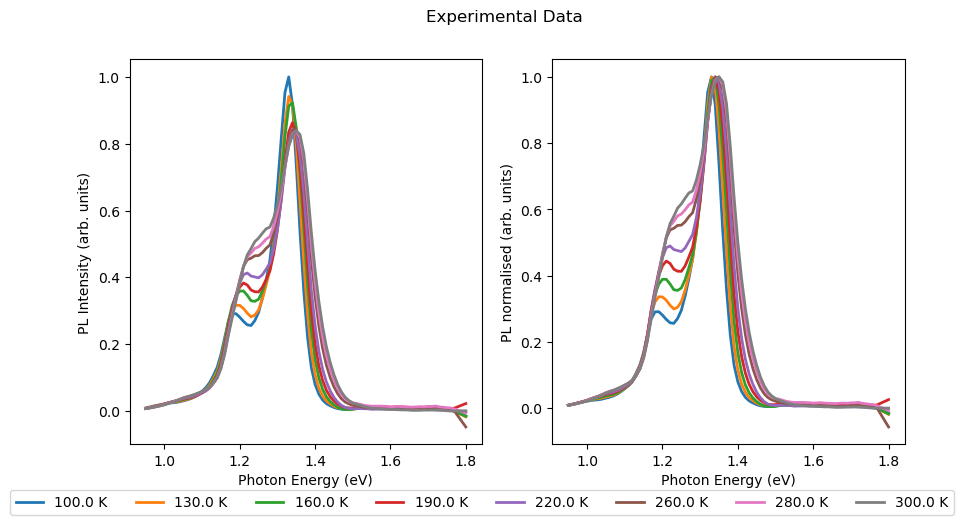

In [29]:
csv_name=csv_files[19]#18,10,14
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)

fig,ax = Exp_data_utils.plot_pl_data(Exp_data, temperature_list, hws,title="Experimental Data")

In [30]:

csv_name=csv_files[0]#3 for y6, 18 for ITIC,12 for L8BO
for x in [19]:
    csv_name=csv_files[x]#3 for y6, 18 for ITIC,12 for L8BO
    results_name = csv_name.replace('.csv','').split('/')[-1]
    sh_name = f"Run_EMCEE_{results_name}.sh"
    script="#!/bin/bash \n"+\
        "#PBS -l walltime=07:59:01 \n"+\
        "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"+\
        " \n"+\
        "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
        "module load anaconda3/personal \n"+ \
        "source activate pymc_env     \n"+\
        f"python src/pl_temp_fit/fit_Pl_exp_EMCEE.py --test_number 2 --data_file {csv_name} \n"#${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
    #print(script) 
    with open(f'HPC_bash_script/{sh_name}', 'wb') as f:
        f.write( bytes(script, 'utf-8'))  
    script= f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"#submit to HPC
    !{script}
    #!qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}#submit to HPC

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


In [34]:
!qstat

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
Job id            Name             User              Time Use S Queue
----------------  --------

# analyse the results

In [53]:
# analyse results
import importlib
import glob
csv_files = glob.glob('experiemental_data/*/*.csv')
#csv_names=[csv_files[x] for x in [3,18,12]]#3 for y6, 18 for ITIC,12 for L8BO
csv_names = csv_files
list_params = []
for csv_name in csv_names:
    folder = glob.glob(f"fit_experimental_emcee/*/{csv_name.split('/')[-1]}/*")
    for f in folder:
        name = f.split('/')[-1]
        if 'sampler.h5' in os.listdir(f):
            
            saver_folder = f
            params_dict = {}
            for x in name.split(' '):
                if '=' in x:
                    try:
                        params_dict[x.split('=')[0]]=int(x.split('=')[1])
                    except:
                        #print(x)
                        pass

            # put results into a dataframe
        # reload sampler from file
            try:
                filename = f + "/sampler.h5"

                reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
                distribution = reader.get_chain(discard=1, thin=5, flat=True)
                true_parameters=list(np.mean(distribution,axis=0))
                params_dict['mean'] = [f"{x:.3f}" for x in true_parameters]      
                params_dict['saved_folder'] = f        
                params_dict['num_iteration'] = reader.iteration  
                params_dict['exp_data'] = csv_name.split('/')[-1]   
                log_prob = reader.get_log_prob(discard=2, thin=1, flat=True)  
                params_dict['max_log_prob'] = np.max(log_prob)
                params_dict['csv_position'] = csv_names.index(csv_name)
                list_params.append(params_dict)                      
            except:
                print('error')
                print(f)
                print('error')
                pass
for csv_name in csv_names:
    folder = glob.glob(f"fit_experimental_emcee/*/{csv_name.replace('.csv','').split('/')[-1]}/*")
    for f in folder:
        name = f.split('/')[-1]
        if 'sampler.h5' in os.listdir(f):
            
            saver_folder = f
            params_dict = {}
            for x in name.split('_'):
                if '=' in x:
                    try:
                        params_dict[x.split('=')[0]]=int(x.split('=')[1])
                    except:
                        pass
                        #print(x)
            # put results into a dataframe
        # reload sampler from file
            try:
                filename = f + "/sampler.h5"
                try:
                    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
                except:
                    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="single_core")    
                distribution = reader.get_chain(discard=1, thin=5, flat=True)
                true_parameters=list(np.mean(distribution,axis=0))
                params_dict['mean'] = [f"{x:.3f}" for x in true_parameters]      
                params_dict['saved_folder'] = f        
                params_dict['num_iteration'] = reader.iteration  
                params_dict['exp_data'] = csv_name.split('/')[-1]   
                log_prob = reader.get_log_prob(discard=2, thin=1, flat=True)  
                params_dict['max_log_prob'] = np.max(log_prob)
                params_dict['csv_position'] = csv_names.index(csv_name)
                list_params.append(params_dict)                      
            except:
                print('error')
                print(f)
                print('error')
                pass


import pandas as pd
df = pd.DataFrame.from_records(list_params)
df


error
fit_experimental_emcee/2024_02_20/L8BO-noanneal.csv/ sigma=0.01 temperature_list=7 number_free_parameters=5 Temp_std_err=2 hws_std_err=0.005 relative_intensity_std_error=0.01
error
error
fit_experimental_emcee/2024_01_24/Y6_SWrecipe.csv/num_samples= sigma=0.005 temperature_list=7 number_free_parameters=5 Temp_std_err=10 hws_std_err=0.005 relative_intensity_std_error=0.05
error
error
fit_experimental_emcee/2024_02_20/L8BO-noanneal.csv/ sigma=0.01 temperature_list=7 number_free_parameters=5 Temp_std_err=2 hws_std_err=0.005 relative_intensity_std_error=0.01
error
error
fit_experimental_emcee/2024_02_20/Y6-12mgml-100Canneal_test/sigma=0.005_temperature_list=3_number_free_parameters=5_Temp_std_err=10_hws_std_err=0.005
error
error
fit_experimental_emcee/2024_03_01/IEICO/sigma=0.001_temperature_list=8_number_free_parameters=5_Temp_std_err=5_hws_std_err=0.005
error
error
fit_experimental_emcee/2024_03_01/IEICO/sigma=0.001_temperature_list=8_number_free_parameters=5_Temp_std_err=5_hws_std

temperature_list  number_free_parameters  Temp_std_err  \
0                4.0                     5.0           2.0   
1                7.0                     5.0           2.0   
2                7.0                     5.0           2.0   
3                5.0                     5.0           2.0   
4                8.0                     5.0           2.0   
5                8.0                     5.0           2.0   
6                7.0                     5.0           2.0   
7                4.0                     5.0           2.0   
8                7.0                     5.0           2.0   
9                7.0                     5.0           2.0   
10               NaN                     NaN           NaN   
11               NaN                     NaN           NaN   
12               NaN                     NaN           NaN   
13               NaN                     NaN           NaN   
14               NaN                     NaN           NaN   
15               NaN                     NaN           NaN   

                                   mean  \
0   [1.413, 0.021, 0.053, 0.077, 0.178]   
1   [1.902, 0.003, 0.193, 0.041, 0.192]   
2   [1.650, 0.004, 0.109, 0.141, 0.174]   
3   [1.077, 0.006, 0.041, 0.187, 0.123]   
4   [1.805, 0.019, 0.102, 0.072, 0.164]   
5   [1.852, 0.023, 0.056, 0.048, 0.157]   
6   [1.359, 0.013, 0.058, 0.091, 0.164]   
7   [1.413, 0.021, 0.053, 0.077, 0.178]   
8   [1.902, 0.003, 0.193, 0.041, 0.192]   
9   [1.650, 0.004, 0.109, 0.141, 0.174]   
10  [1.686, 0.014, 0.093, 0.152, 0.172]   
11  [1.410, 0.017, 0.050, 0.091, 0.170]   
12  [1.398, 0.016, 0.082, 0.048, 0.136]   
13  [1.381, 0.016, 0.055, 0.104, 0.141]   
14  [1.410, 0.017, 0.050, 0.091, 0.170]   
15  [1.398, 0.016, 0.082, 0.048, 0.136]   

                                         saved_folder  num_iteration  \
0   fit_experimental_emcee/2024_01_24/L8BO-noannea...          10000   
1   fit_experimental_emcee/2024_01_24/ITIC.csv/ si...            157   
2   fit_experimental_emcee/2024_01_25/ITIC.csv/ si...          10000   
3   fit_experimental_emcee/2024_01_26/PM6Y61_1PL.c...           2121   
4   fit_experimental_emcee/2024_01_25/IT_4F_temp.c...            143   
5   fit_experimental_emcee/2024_01_26/IT_4F_temp.c...           1017   
6   fit_experimental_emcee/2024_01_24/Y6_SWrecipe....          10000   
7   fit_experimental_emcee/2024_01_24/L8BO-noannea...          10000   
8   fit_experimental_emcee/2024_01_24/ITIC.csv/ si...            157   
9   fit_experimental_emcee/2024_01_25/ITIC.csv/ si...          10000   
10  fit_experimental_emcee/2024_02_20/ITIC_no_anne...          10000   
11  fit_experimental_emcee/2024_02_21/L8BO-noannea...          10000   
12  fit_experimental_emcee/2024_03_01/IEICO/_sigma...           1739   
13  fit_experimental_emcee/2024_02_20/Y6-12mgml-10...          10000   
14  fit_experimental_emcee/2024_02_21/L8BO-noannea...          10000   
15  fit_experimental_emcee/2024_03_01/IEICO/_sigma...           1739   

                    exp_data  max_log_prob  csv_position  TempList  \
0          L8BO-noanneal.csv    -10.696348            11       NaN   
1                   ITIC.csv   -106.280932            15       NaN   
2                   ITIC.csv    -26.262534            15       NaN   
3             PM6Y61_1PL.csv    -40.028233            22       NaN   
4             IT_4F_temp.csv   -222.714858            26       NaN   
5             IT_4F_temp.csv   -165.442661            26       NaN   
6            Y6_SWrecipe.csv    -11.672517            29       NaN   
7          L8BO-noanneal.csv    -10.696348            38       NaN   
8                   ITIC.csv   -106.280932            44       NaN   
9                   ITIC.csv    -26.262534            44       NaN   
10        ITIC_no_anneal.csv    -35.292407             7       7.0   
11         L8BO-noanneal.csv    -33.392245            11       7.0   
12                 IEICO.csv    -47.006176            19       8.0   
13  Y6-12mgm

In [47]:
distribution.shape

(9472, 5)

In [61]:
reader.get_autocorr_time(tol=0)


array([ 58.8159155 , 106.00834285, 113.47396005, 127.7052783 ,
        42.15314152])

Initial size: 2184
Initial size: 2184
(69824,)


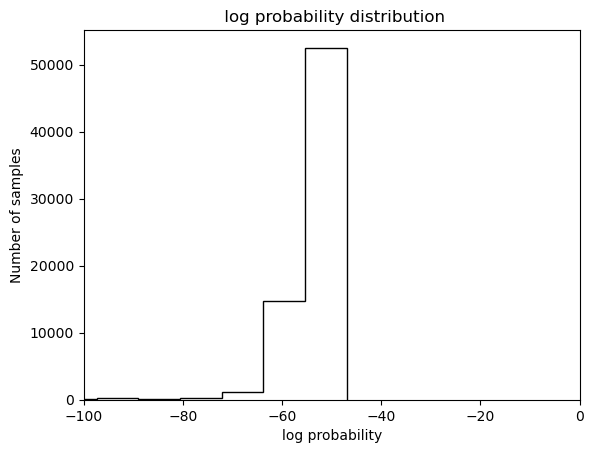

(69824,)
experiemental_data/2023-12-12-Lowtemp-PL/IEICO.csv
 true parameter mean [1.3982147880846856, 0.016479687883707926, 0.08259075678115356, 0.04735064325652761, 0.13613274325262875]


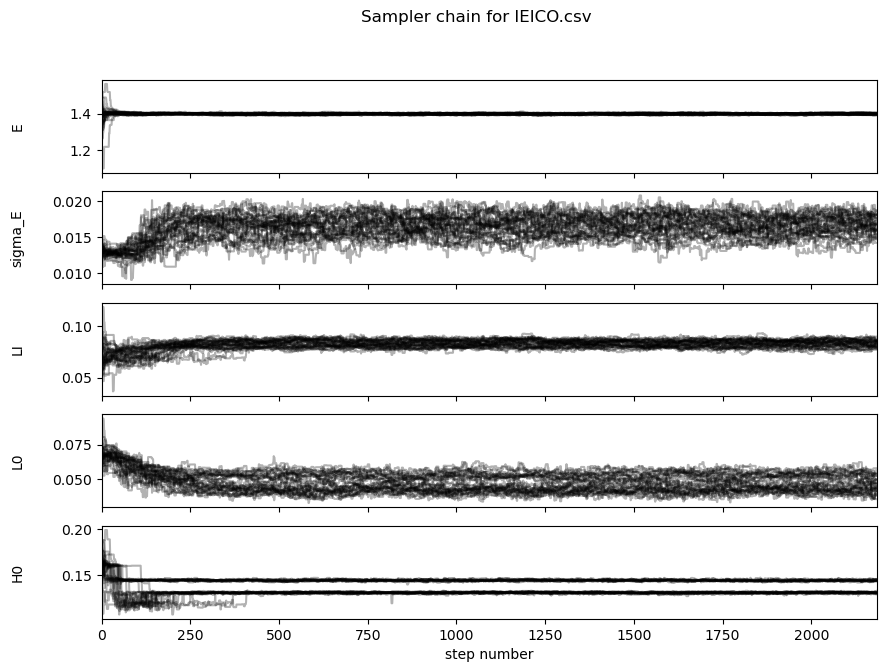

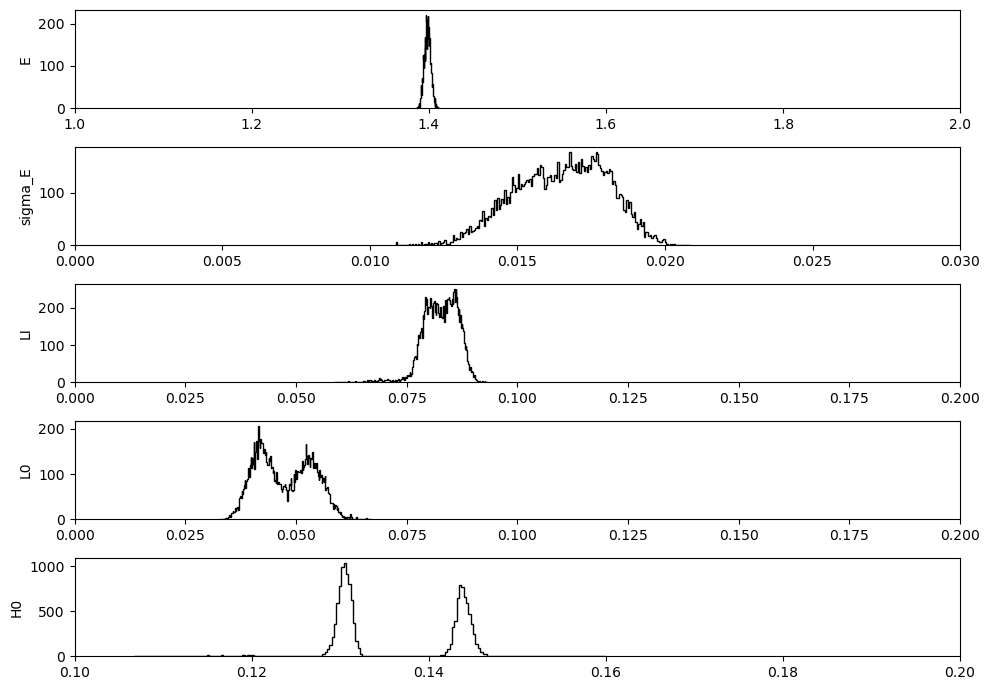

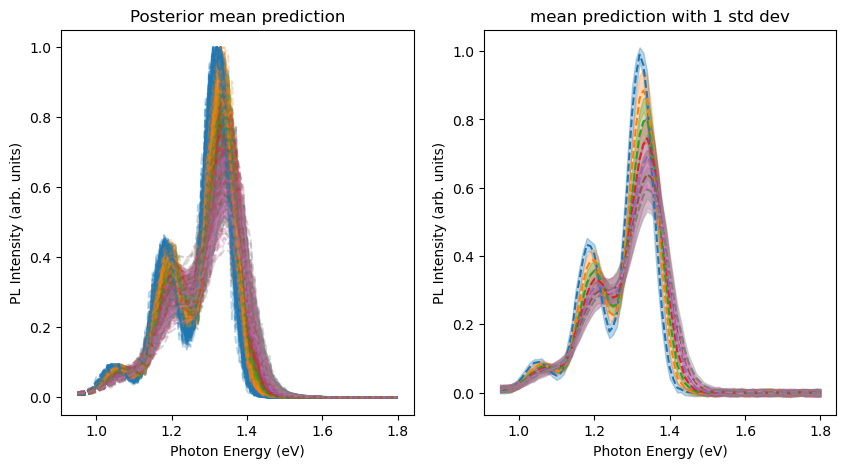

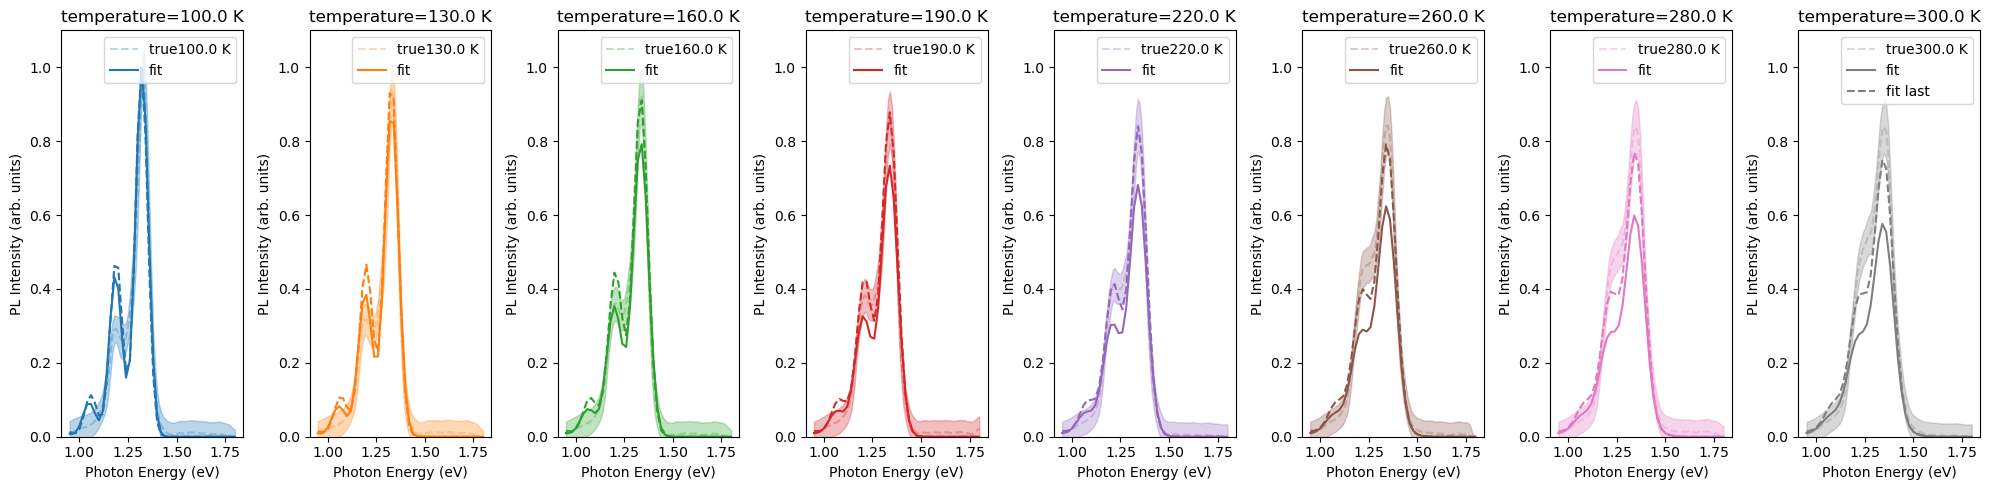

In [63]:
# reload sampler from file
index = 12
filename = df['saved_folder'][index] + "/sampler.h5"
csv_name = csv_names[df['csv_position'][index]]
reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
print("Initial size: {0}".format(reader.iteration))
#new_sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(Exp_data, co_var_mat, temperature_list, hws),backend=new_backend)
#new_sampler.run_mcmc(new_sampler.get_chain()[0, :, :], 10, progress=True)
#print("Final size: {0}".format(new_backend.iteration))
#load data and plot the relevant histograms
filename = df['saved_folder'][index] + "/sampler.h5"
csv_name = csv_names[df['csv_position'][index]]
reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
print("Initial size: {0}".format(reader.iteration))
flat_samples = reader.get_log_prob(discard=2, thin=1, flat=True)
print(flat_samples.shape)
plt.hist(flat_samples[flat_samples>-1e3], 100, color="k", histtype="step")
plt.xlabel("log probability")
plt.ylabel("Number of samples")
plt.xlim(-100,0)
plt.title(' log probability distribution')
plt.show()
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = reader.get_chain()
labels = ["E", "sigma_E", "LI", "L0", "H0"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
#flat_samples.shape
distribution = reader.get_chain(discard=100, thin=5, flat=True)
true_parameters=list(np.mean(distribution,axis=0))
print(flat_samples.shape)
fig, axes = plt.subplots(5, figsize=(10, 7))
axes_xlim = [[1,2],[0,0.03],[0,0.2],[0,0.2],[0.1,0.2]]
for i in range(ndim):
    ax = axes[i]
    ax.hist(distribution[:, i], 200, color="k", histtype="step")
    #ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.set_xlim(axes_xlim[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)
fig.tight_layout()
fig.show()
# add noise to the data and plot it now with the fitted parameters
#plot posterior predictive
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
true_parameters=list(np.mean(distribution,axis=0))
print(' true parameter mean' ,true_parameters)
truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( true_parameters, temperature_list, hws   ) 
truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, save_folder, model_config, savefig=False, true_parameters=true_parameters)
variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, save_folder)
for i,axes  in enumerate(ax): 
    axes.plot(hws,truemodel_pl[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
last_sample = distribution[-1,:]
truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( last_sample, temperature_list, hws   ) 
truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
for i,axes in enumerate(ax):
    axes.plot(hws,truemodel_pl[:,i],label='fit last',color="C" + str(i) ,linestyle='--')

axes.legend()

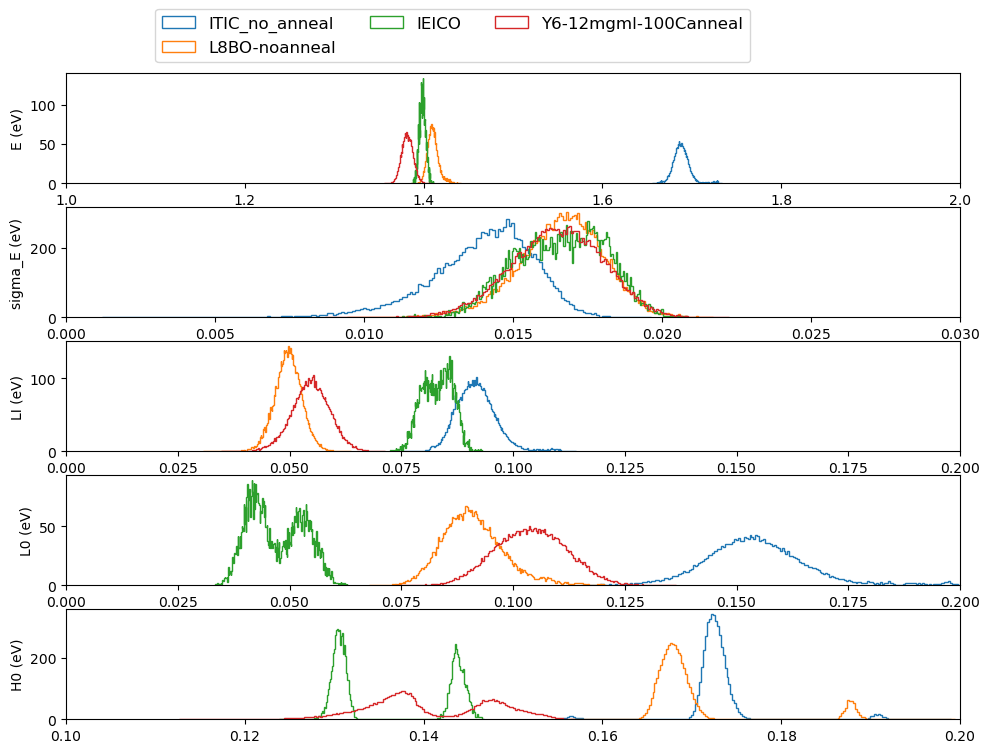

In [64]:
fig, axes = plt.subplots(5, figsize=(10, 7))
labels = ["E (eV)" , "sigma_E (eV)", "LI (eV)", "L0 (eV)", "H0 (eV)"]

for index in [10,11,12,13]:

    filename = df['saved_folder'][index] + "/sampler.h5"
    csv_name = csv_names[df['csv_position'][index]]
    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
    distribution = reader.get_chain(discard=1000, thin=5, flat=True)
    ndim = distribution.shape[1]
    axes_xlim = [[1,2],[0,0.03],[0,0.2],[0,0.2],[0.1,0.2]]
    for i in range(ndim):
        ax = axes[i]
        ax.hist(distribution[:, i], 200, color=f"C{index}", histtype="step",label=csv_name.replace('.csv','').split('/')[-1],density=True)
        #ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.set_xlim(axes_xlim[i])
fig.tight_layout(h_pad=0.0)
axes[0].legend(ncol=3,fontsize=12,loc=[0.1,1.1])


/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6831: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6832: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


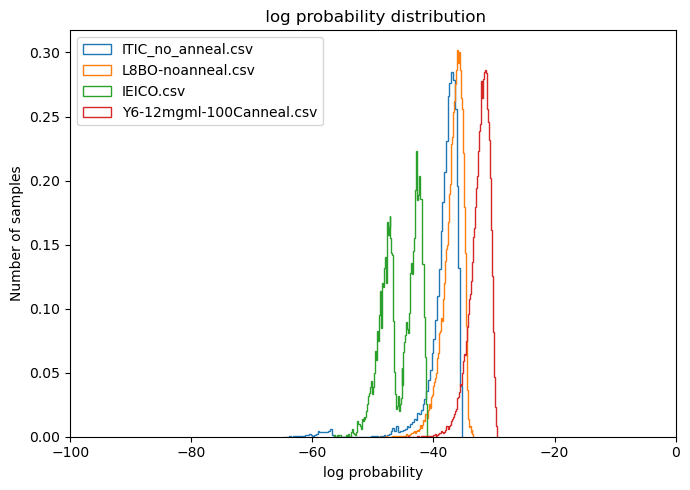

In [59]:
fig, axes = plt.subplots(1, figsize=(7, 5))
labels = ["E (eV)" , "sigma_E (eV)", "LI (eV)", "L0 (eV)", "H0 (eV)"]

for index in [10,11,12,13]:

    filename = df['saved_folder'][index] + "/sampler.h5"
    csv_name = csv_names[df['csv_position'][index]]
    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")

    axes_xlim = [[1,2],[0,0.03],[0,0.2],[0,0.2],[0.1,0.2]]
    flat_samples = reader.get_log_prob(discard=1000, thin=5, flat=True)
    try:
        axes.hist(flat_samples*7/df['temperature_list'][index], 100, color=f"C{index}", histtype="step",label=csv_name.split('/')[-1],density=True)
    except:
        axes.hist(flat_samples*7/df['TempList'][index], 100, color=f"C{index}", histtype="step",label=csv_name.split('/')[-1],density=True)
axes.set_xlabel("log probability")
axes.set_ylabel("Number of samples")
axes.set_xlim(-100,0)
axes.set_title(' log probability distribution')
axes.legend(loc="upper left")

fig.tight_layout(h_pad=0.0)

In [44]:
np.random.shuffle(distribution)
distribution

array([[1.4019803 , 0.01675146, 0.05151087, 0.08160039, 0.16795514],
       [1.41367871, 0.01698728, 0.04936858, 0.0946821 , 0.18837201],
       [1.42339857, 0.01730397, 0.0469736 , 0.10321041, 0.16856143],
       ...,
       [1.40074422, 0.01645974, 0.04761049, 0.08458106, 0.16892378],
       [1.4149926 , 0.01686802, 0.05021133, 0.09328478, 0.16724869],
       [1.41836328, 0.01836784, 0.05483089, 0.09565666, 0.16855625]])

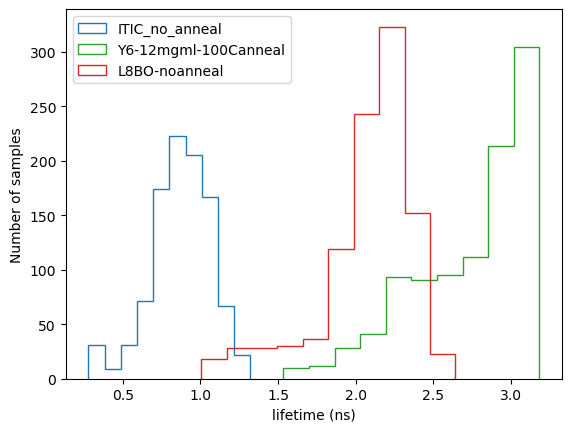

In [57]:
#plotting the lifetime
from pl_temp_fit import LTPL
def calculate_lifetime(theta, temperature_list, hws):

    E, sigma, LI, L0, H0 = theta
    data = LTPL.Data()
    data.CT = LTPL.State(
        E=1.1,
        vmhigh=2,
        vmlow=2,
        sigma=0.01,
        numbrstates=20,
        off=1,
        LI=0.1,
        L0=0.1,
        H0=0.15,
        fosc=5,
    )
    data.D.hw = np.arange(0.5, 3, 0.02)
    data.D.T = temperature_list  # np.array([300.0, 150.0, 80.0])
    data.EX = LTPL.State(
        E=E,
        vmhigh=2,
        vmlow=15,
        sigma=sigma,
        numbrstates=20,
        off=0,
        LI=LI,
        L0=L0,
        H0=H0,
        fosc=5,
    )
    LTPL.LTPLCalc(data)

    lifetime = np.array(1/(data.EX.knr+data.EX.kr))
    return lifetime.mean()
fig,ax = plt.subplots()
for index in [10,12,13]:
    filename = df['saved_folder'][index] + "/sampler.h5"
    csv_name = csv_names[df['csv_position'][index]]
    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
    distribution = reader.get_chain(discard=1000, thin=5, flat=True)
    lifetime=[]
    np.random.shuffle(distribution)
    num_samples=1000
    for i in range(num_samples):
        true_parameters = distribution[i]
        lifetime.append(calculate_lifetime(distribution[i], temperature_list, hws)*1e9)

    ax.hist(lifetime, 10, color=f"C{index}", histtype="step",label=csv_name.replace('.csv','').split('/')[-1])
    ax.set_xlabel("lifetime (ns)")
    ax.set_ylabel("Number of samples")
ax.legend(loc="upper left")

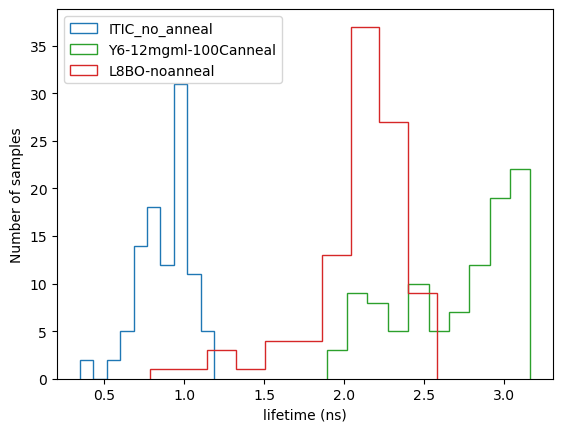

In [55]:
ax.legend(loc="upper left")
fig

experiemental_data/2023-12-12-Lowtemp-PL/ITIC_no_anneal.csv
experiemental_data/2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal.csv
experiemental_data/data_pristine/L8BO-noanneal.csv


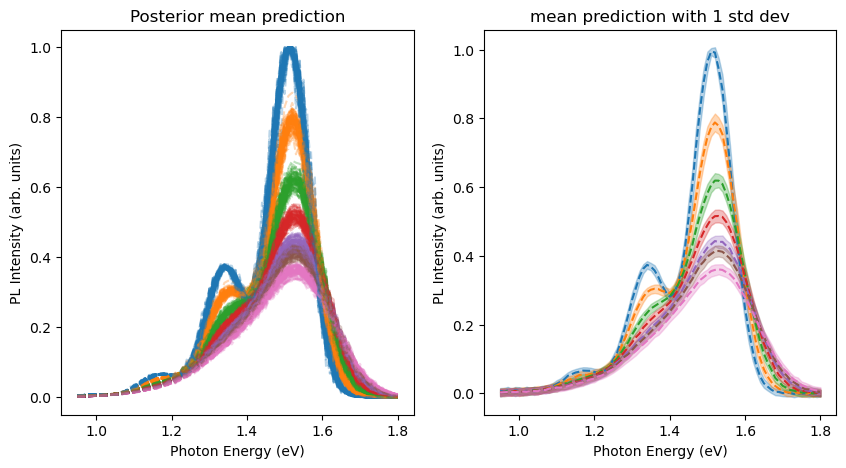

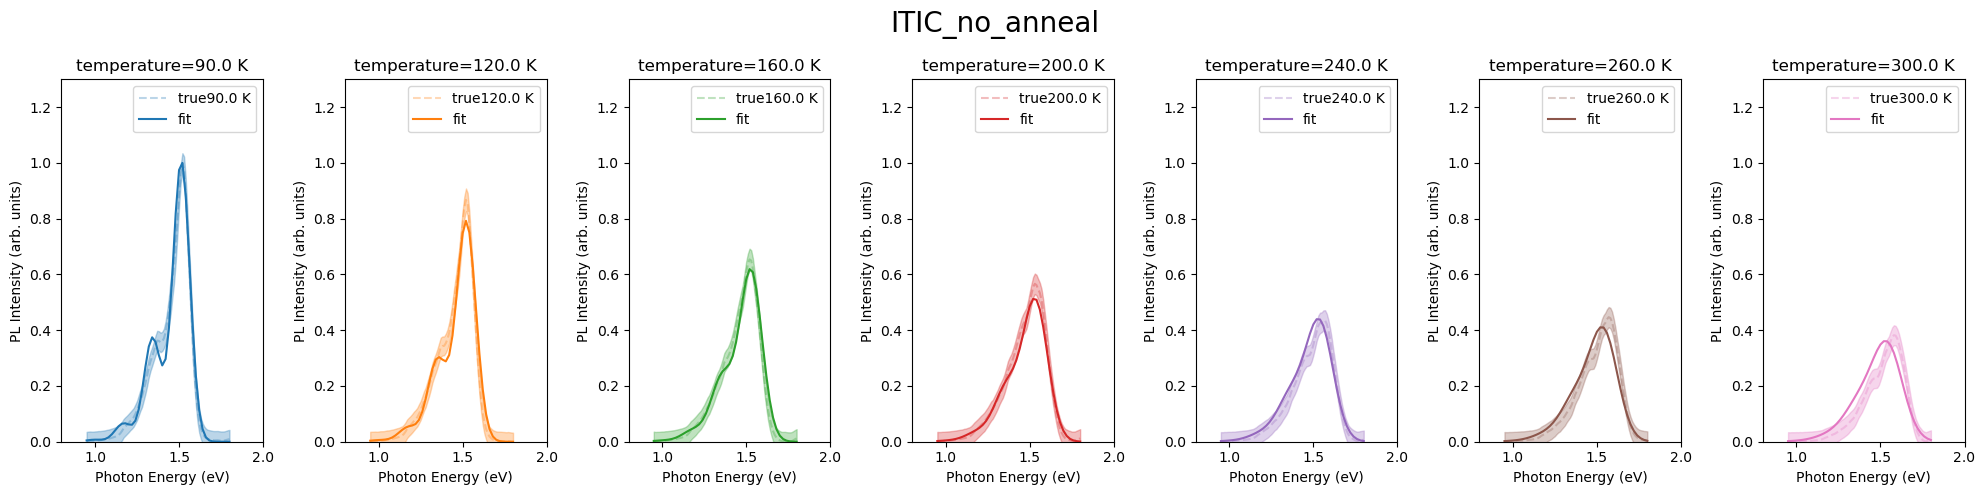

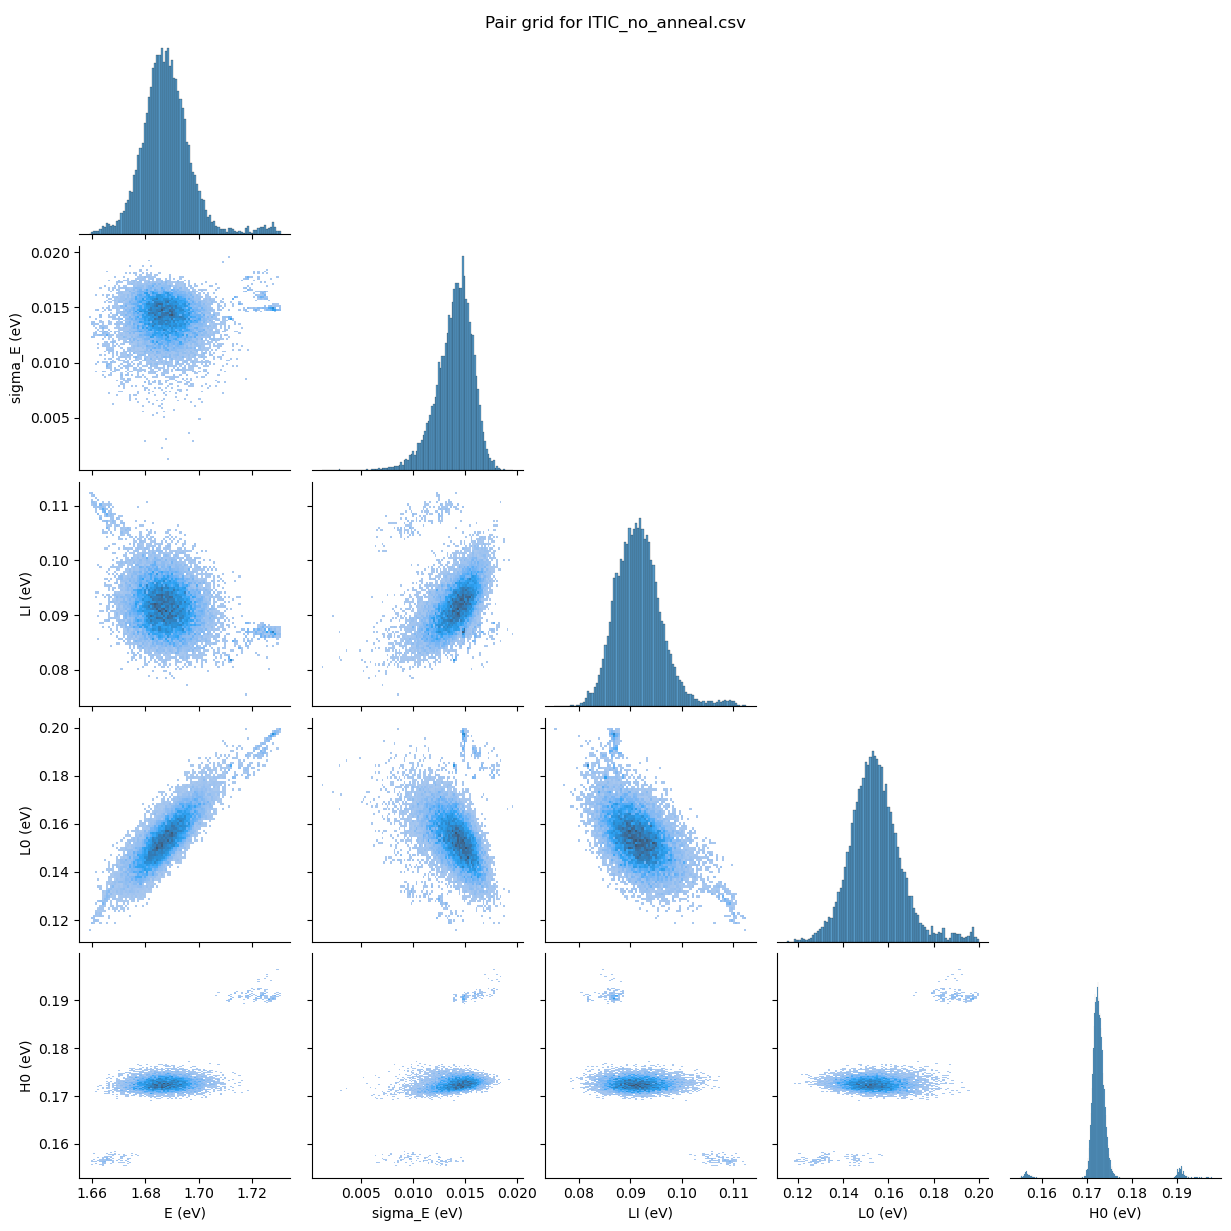

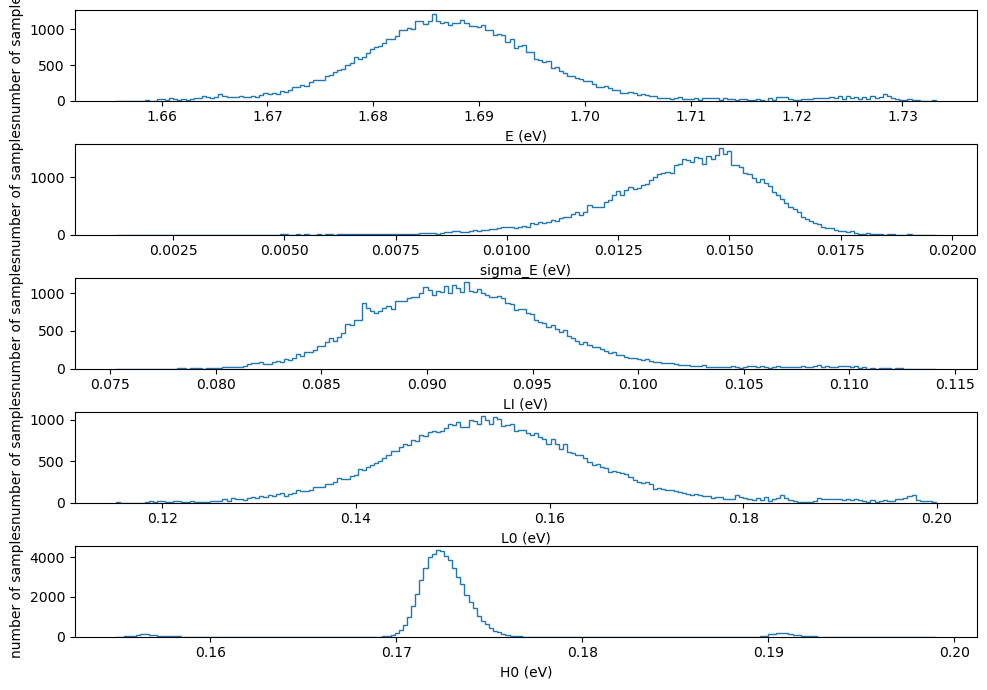

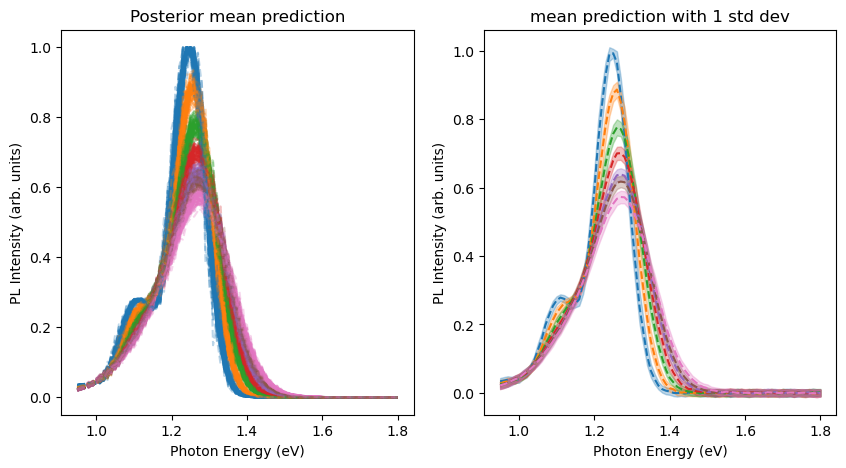

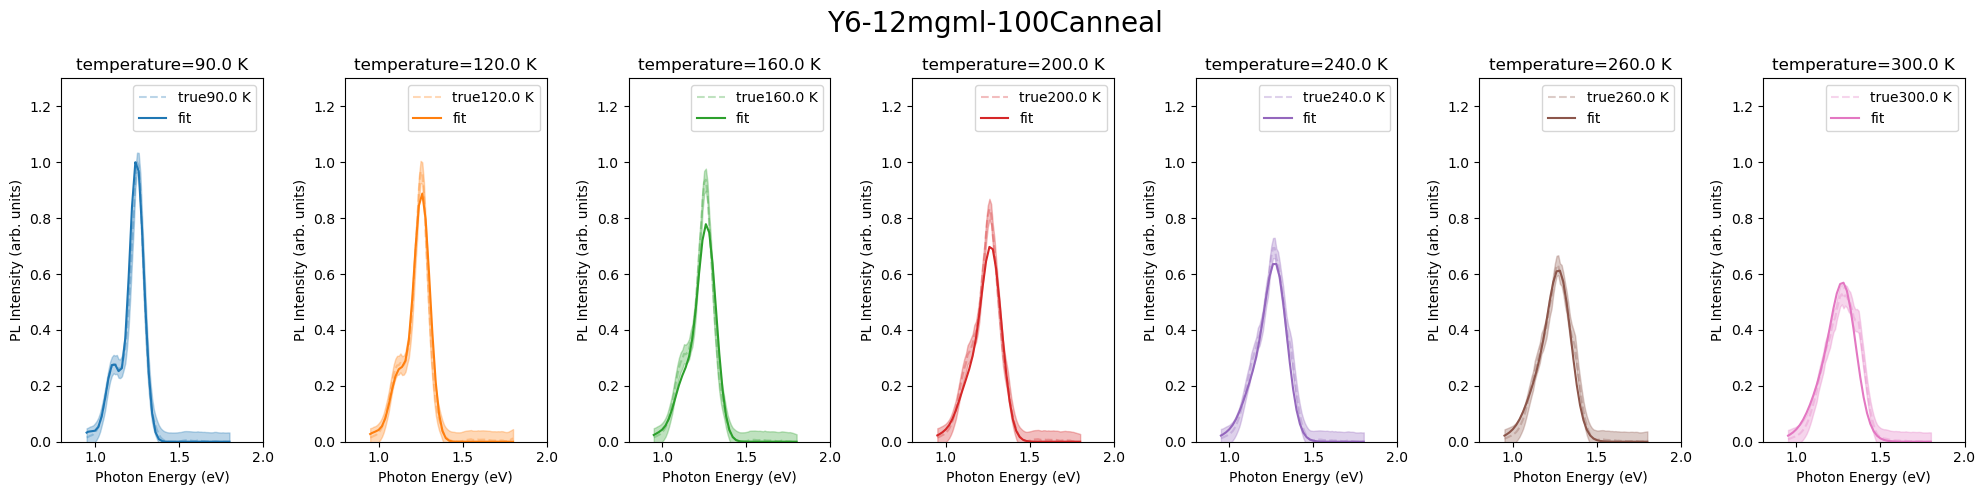

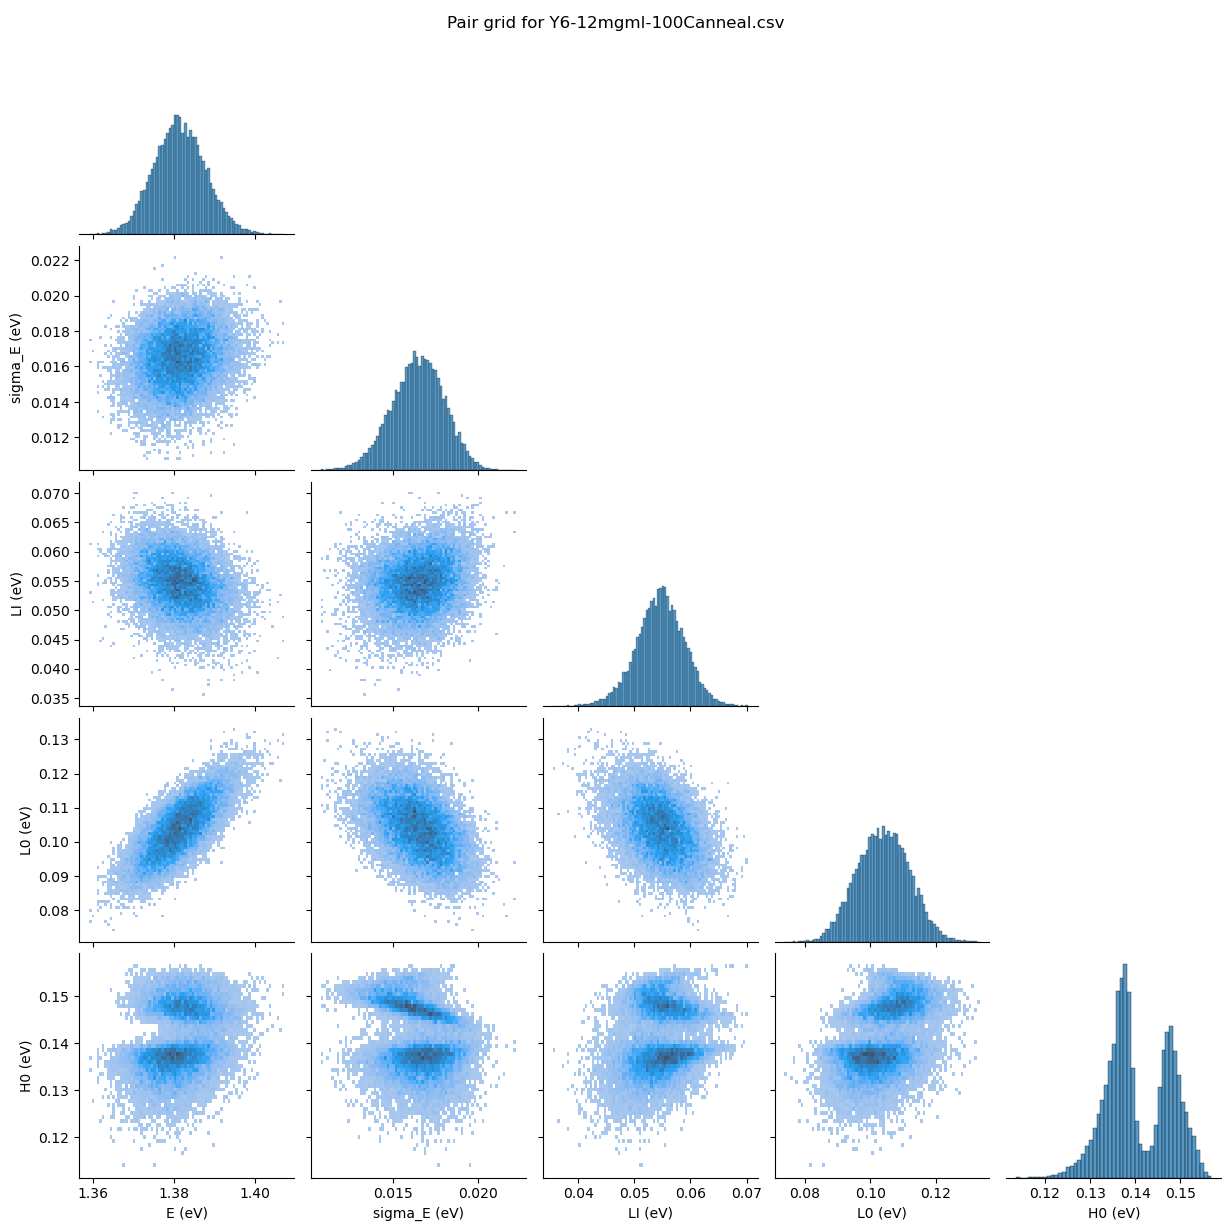

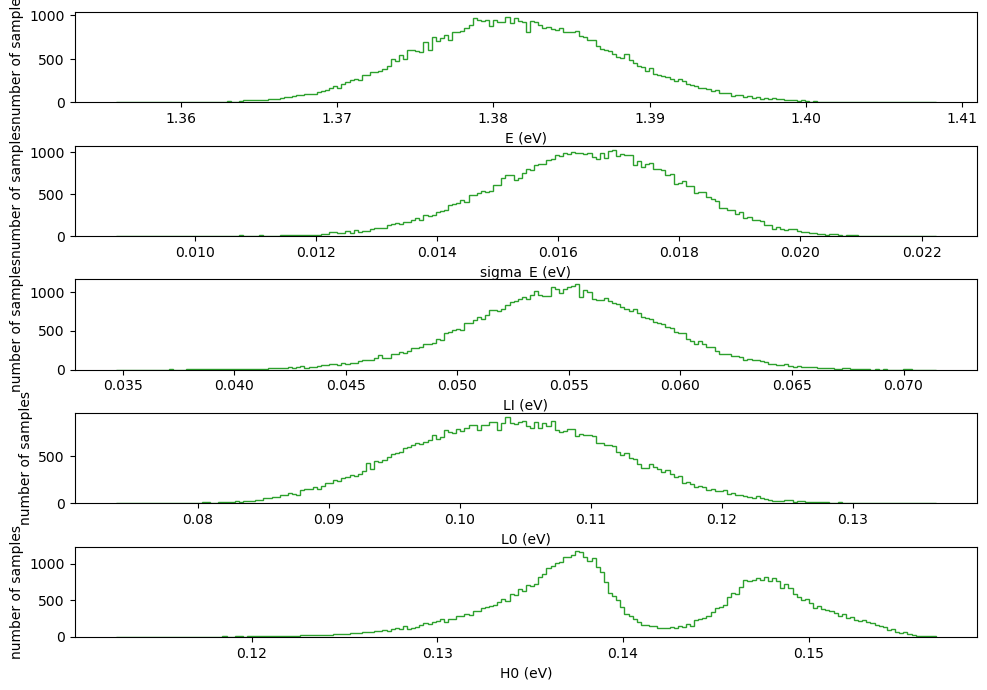

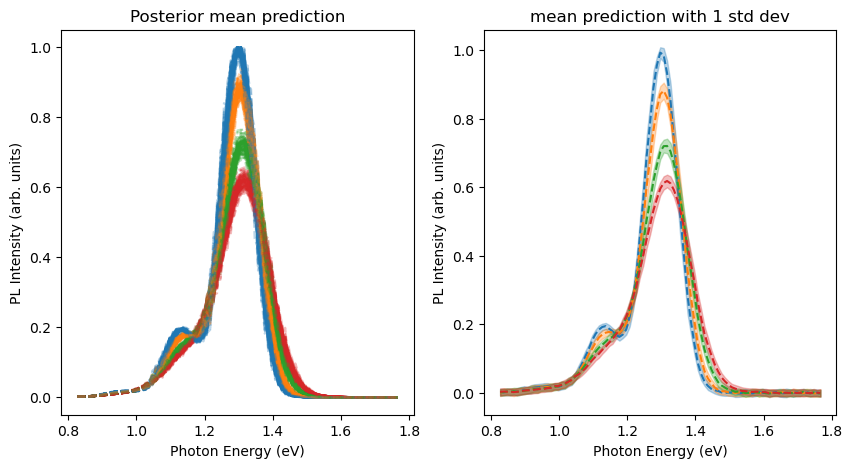

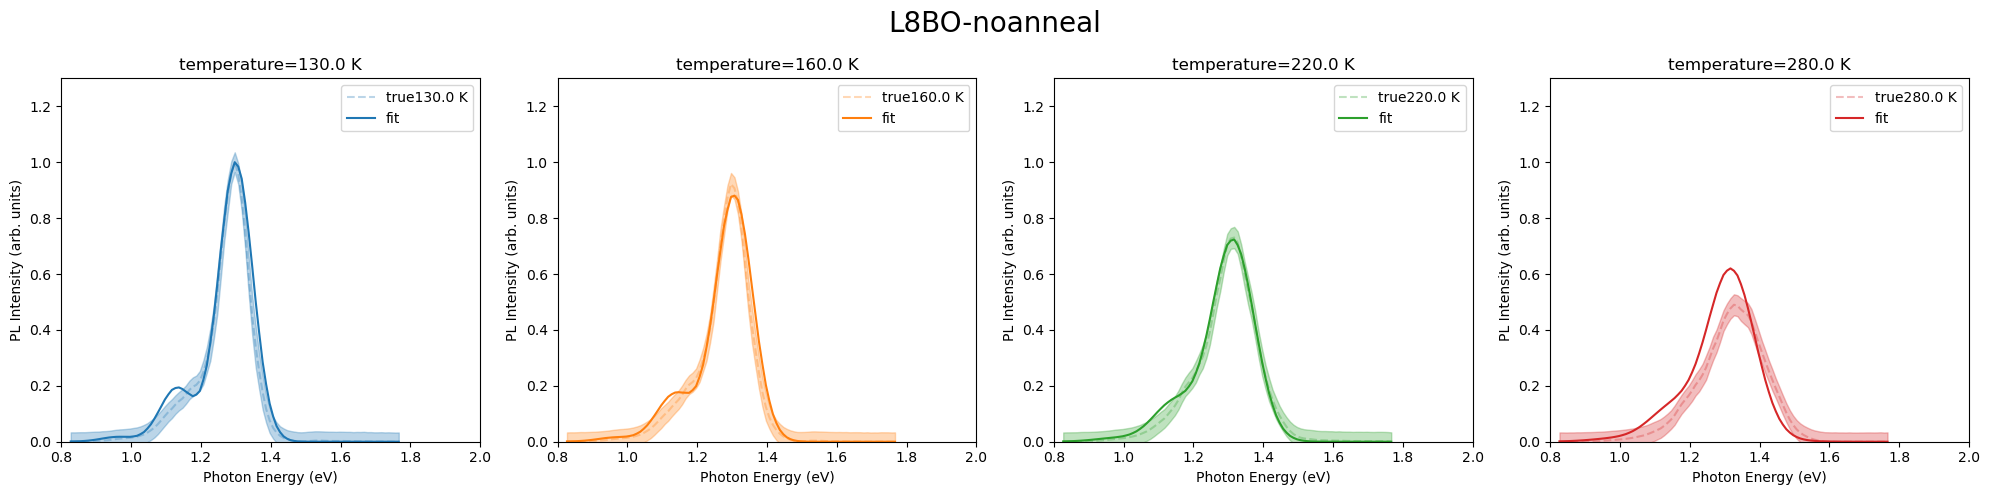

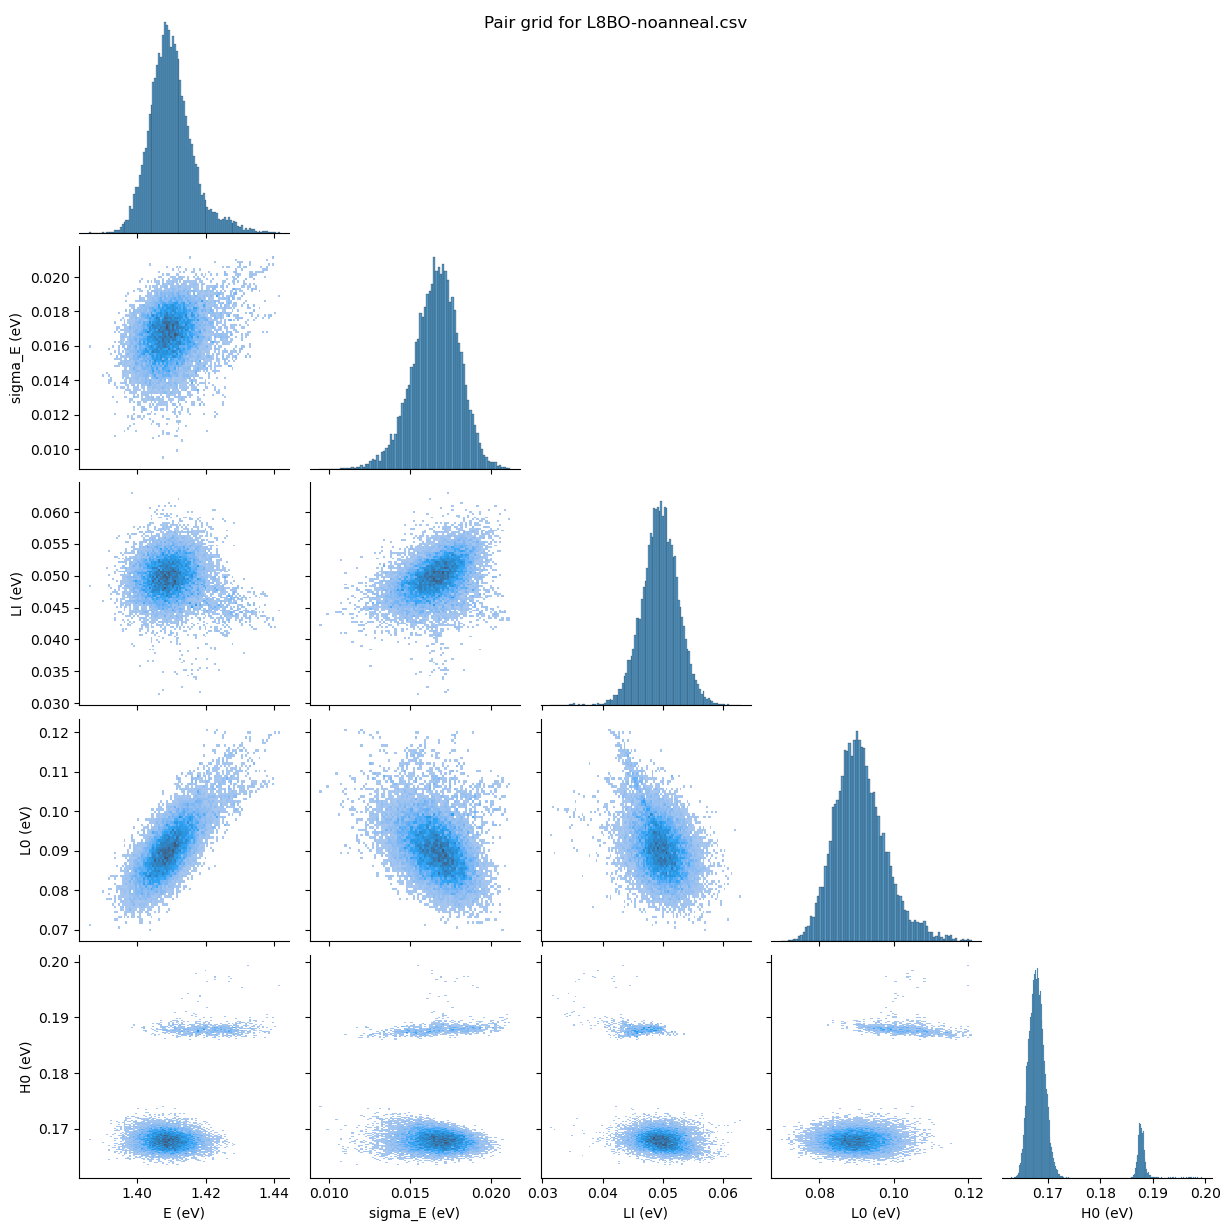

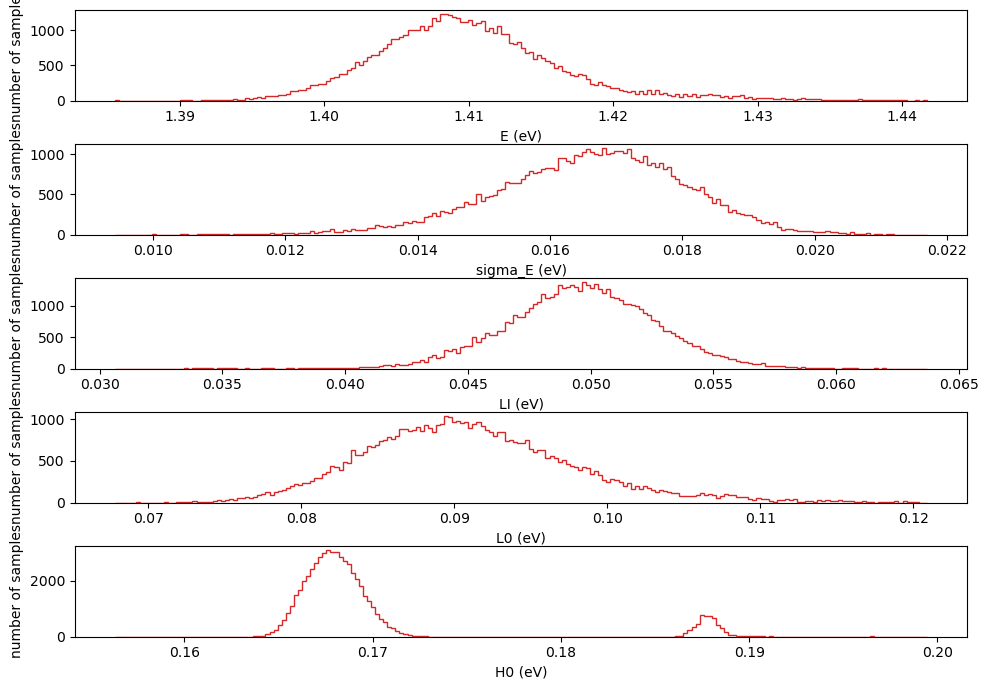

In [18]:
#plot posterior predictive
model_config = {
            "number_free_parameters": 5,
            "sigma": 0.001,
            "Temp_std_err": 2,
            "hws_std_err": 0.005,
            "relative_intensity_std_error": 0.01,
        }
for index in [10,12,13]:

    filename = df['saved_folder'][index] + "/sampler.h5"
    csv_name = csv_names[df['csv_position'][index]]
    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
    distribution = reader.get_chain(discard=1000, thin=5, flat=True)

    print(csv_name)
    Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
    true_parameters=list(np.mean(distribution,axis=0))
    truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( true_parameters, temperature_list, hws   ) 
    truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
    co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, "", model_config, savefig=False, true_parameters=true_parameters)
    variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
    fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, "")
    for i,axes  in enumerate(ax): 
        axes.plot(hws,truemodel_pl[:,i],label='fit',color="C" + str(i) )
        axes.legend()
        axes.set_ylim(0,1.3)
        axes.set_xlim(0.8,2)
    fig.suptitle(csv_name.replace('.csv','').split('/')[-1], fontsize=20)
    fig.tight_layout(h_pad=0.0)
    import seaborn as sns
    samples = reader.get_chain(discard=1000, thin=15, flat=True)
    df_samples = pd.DataFrame(samples, columns=labels)
    g = sns.pairplot(df_samples, kind="hist", corner=True)
    #g = sns.PairGrid(df,diag_sharey=False, corner=True)
    #g.map_lower(sns.scatterplot)
    #g.map_diag(sns.kdeplot)
    g.figure.suptitle(f"Pair grid for {csv_name.split('/')[-1]}")
    g.figure.show()
    distribution = reader.get_chain(discard=1000, thin=5, flat=True)
    fig, axes = plt.subplots(5, figsize=(10, 7))
    ndim = distribution.shape[1]
    #axes_xlim = [[1,2],[0,0.03],[0,0.2],[0,0.2],[0.1,0.2]]
    for i in range(ndim):
        ax = axes[i]
        ax.hist(distribution[:, i], 200, color=f"C{index}", histtype="step",label=csv_name.replace('.csv','').split('/')[-1])
        #ax.set_xlim(0, len(samples))
        ax.set_ylabel('number of samples')
        #ax.set_xlim(axes_xlim[i])
        ax.set_xlabel(labels[i])
    fig.tight_layout(h_pad=0.0)

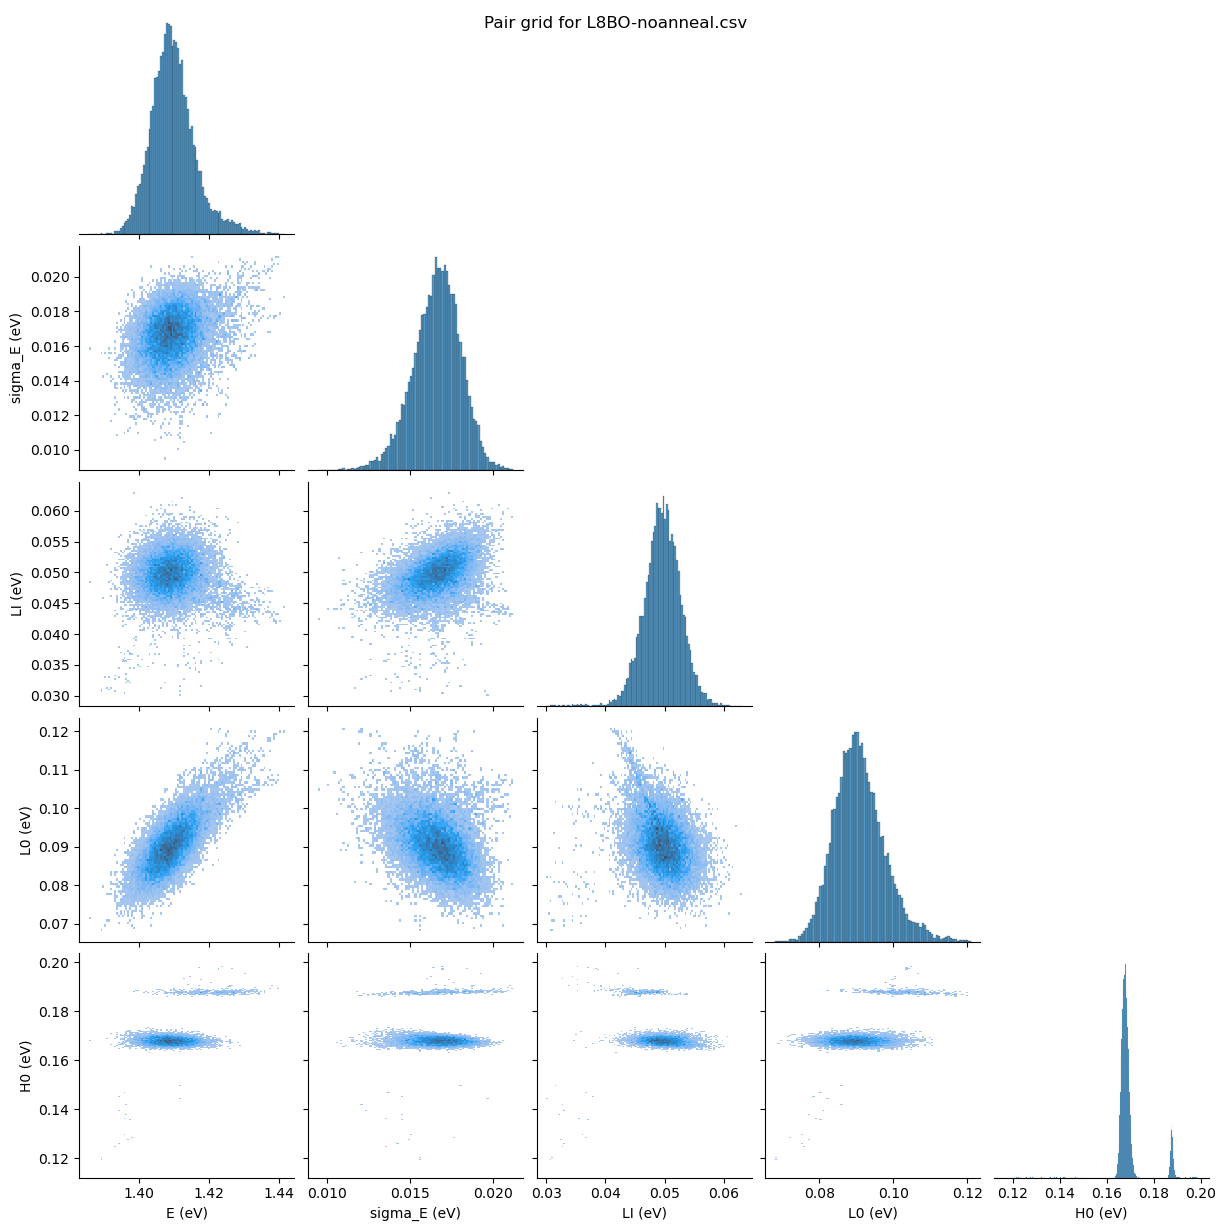

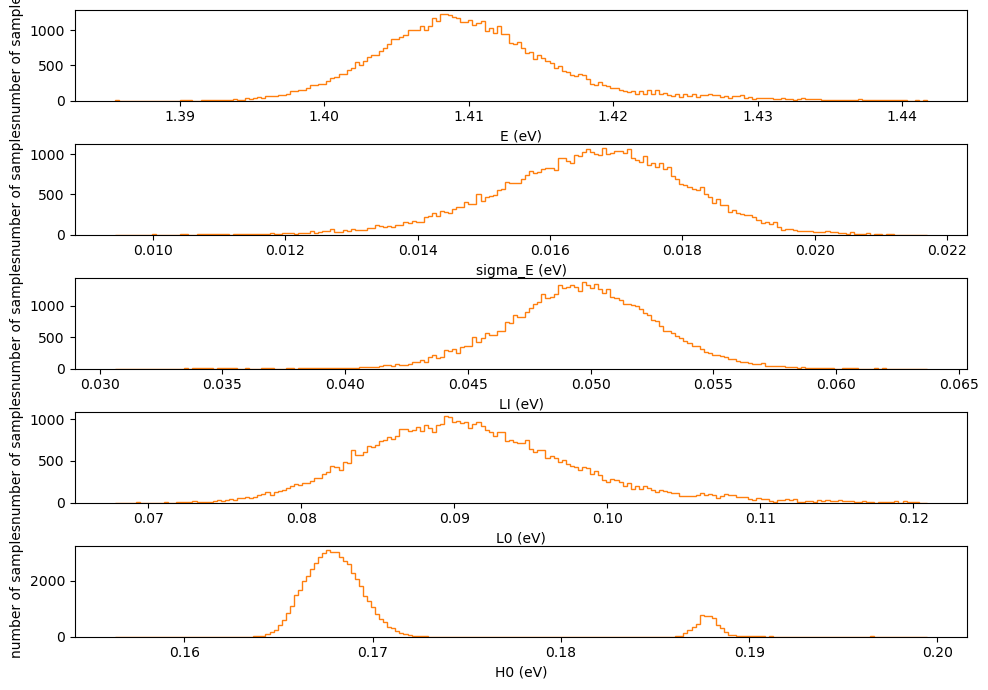

Initial size: 6831
(218528,)


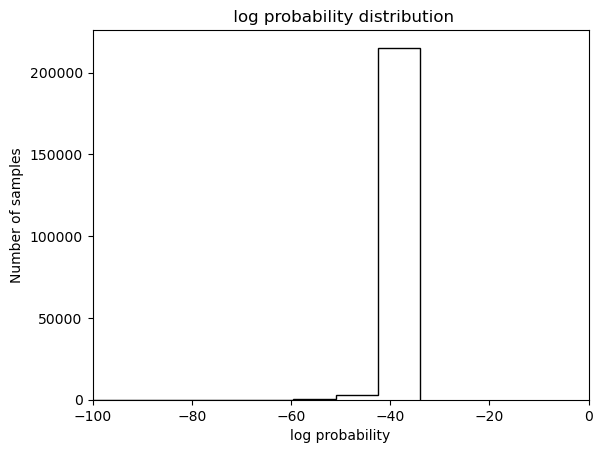

(218528,)
experiemental_data/2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
 true parameter mean [1.4098722868298006, 0.01659004393461998, 0.049602350547678815, 0.09089844370534392, 0.1695142538466428]


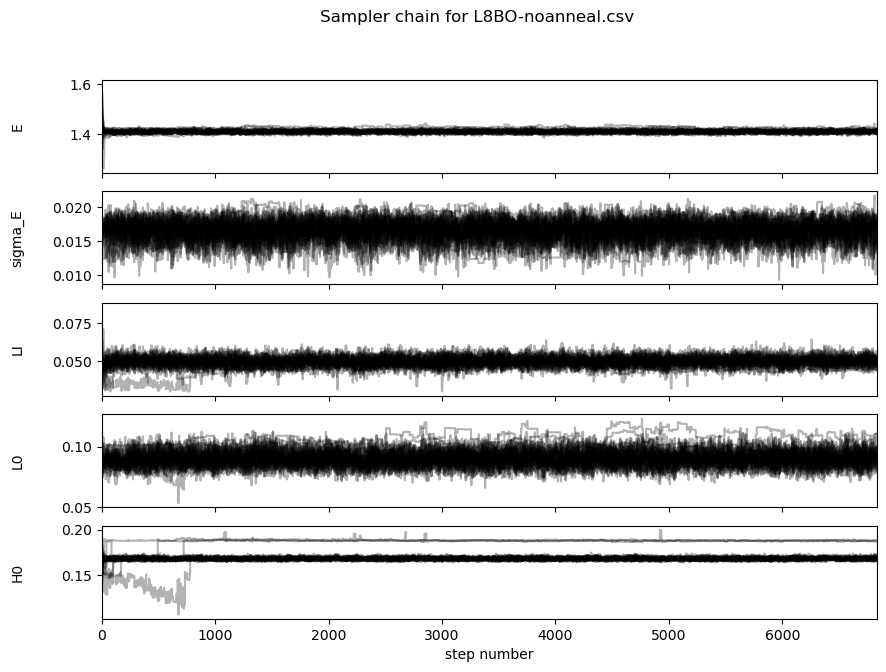

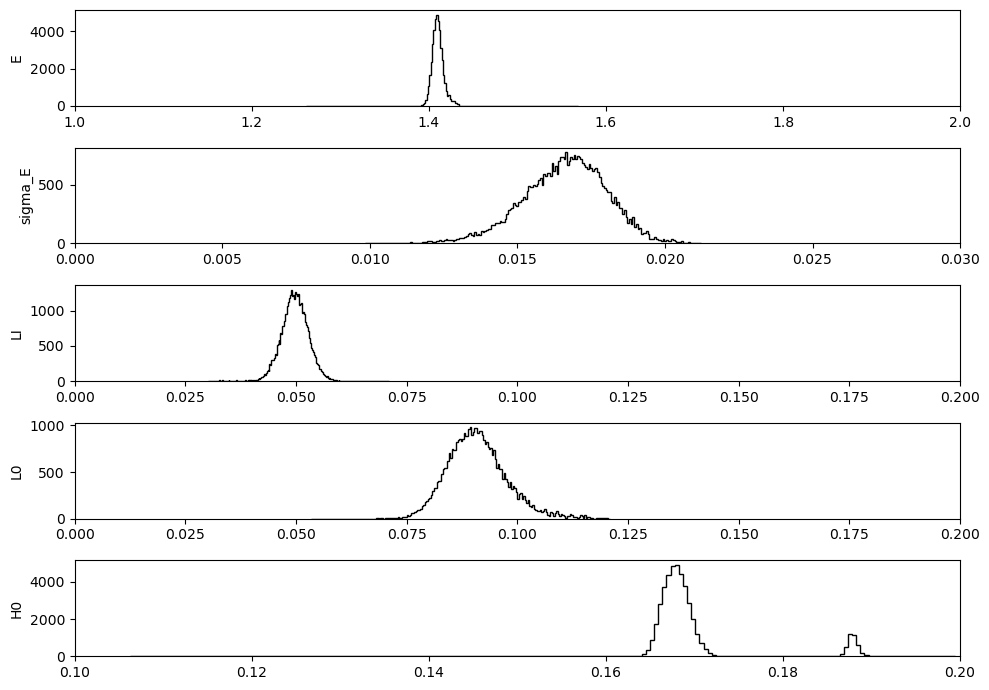

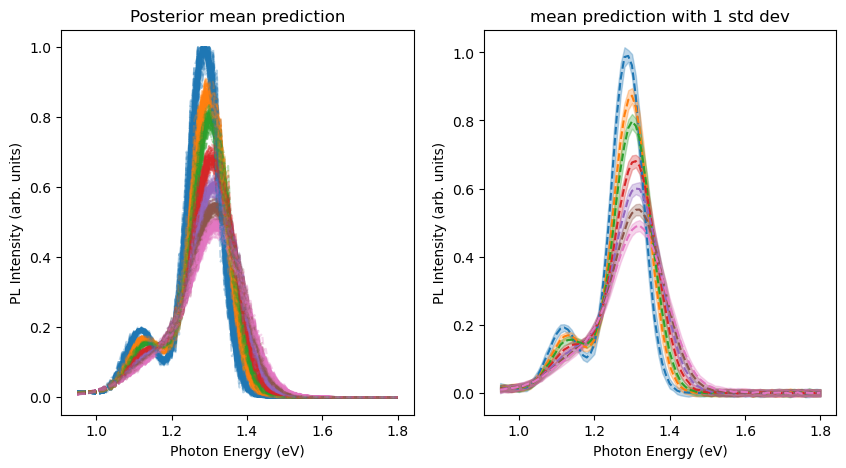

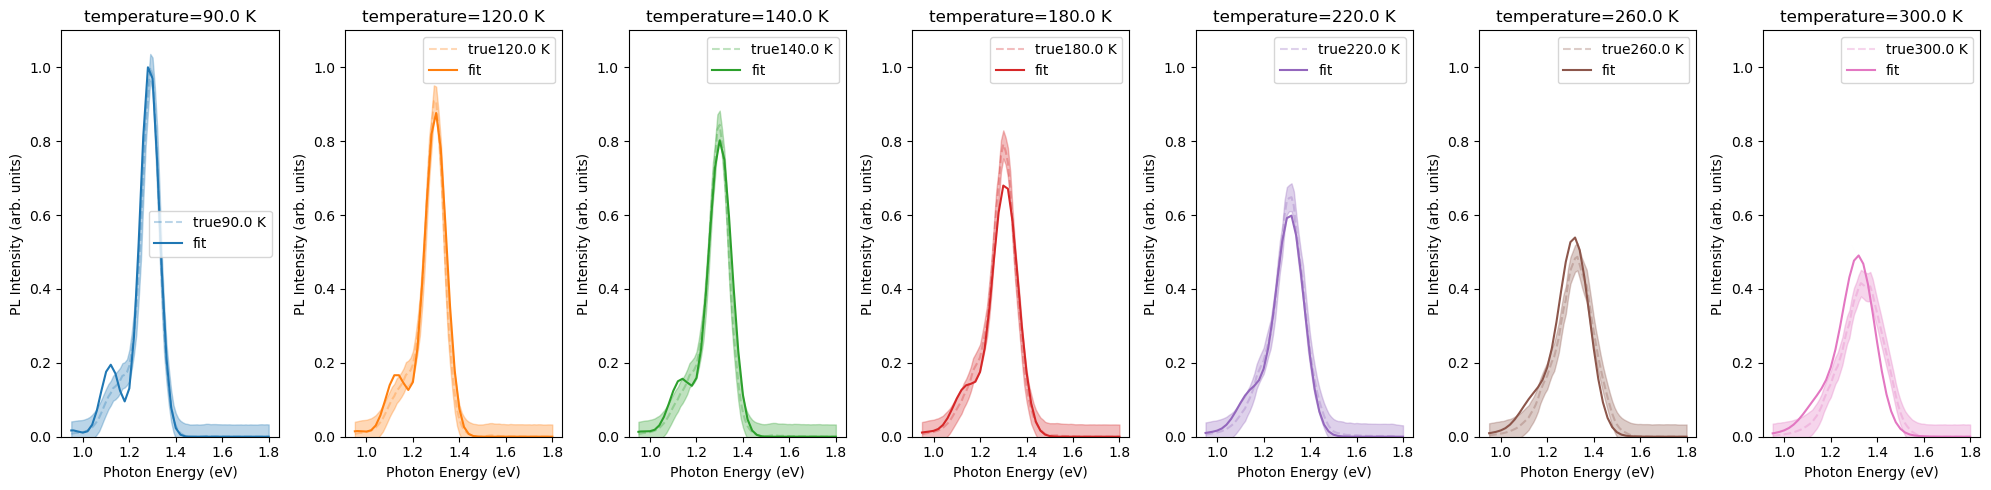

In [87]:
#load data and plot the relevant histograms
index = 11
filename = df['saved_folder'][index] + "/sampler.h5"
csv_name = csv_names[df['csv_position'][index]]
reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
print("Initial size: {0}".format(reader.iteration))
flat_samples = reader.get_log_prob(discard=2, thin=1, flat=True)
print(flat_samples.shape)
plt.hist(flat_samples[flat_samples>-1e3], 100, color="k", histtype="step")
plt.xlabel("log probability")
plt.ylabel("Number of samples")
plt.xlim(-100,0)
plt.title(' log probability distribution')
plt.show()
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = reader.get_chain()
labels = ["E", "sigma_E", "LI", "L0", "H0"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
#flat_samples.shape
distribution = reader.get_chain(discard=1, thin=5, flat=True)
true_parameters=list(np.mean(distribution,axis=0))
print(flat_samples.shape)
fig, axes = plt.subplots(5, figsize=(10, 7))
axes_xlim = [[1,2],[0,0.03],[0,0.2],[0,0.2],[0.1,0.2]]
for i in range(ndim):
    ax = axes[i]
    ax.hist(distribution[:, i], 200, color="k", histtype="step")
    #ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.set_xlim(axes_xlim[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)
fig.tight_layout()
fig.show()
# add noise to the data and plot it now with the fitted parameters
#plot posterior predictive
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
true_parameters=list(np.mean(distribution,axis=0))
print(' true parameter mean' ,true_parameters)
truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( true_parameters, temperature_list, hws   ) 
truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, save_folder, model_config, savefig=False, true_parameters=true_parameters)
variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, save_folder)
for i,axes  in enumerate(ax): 
    axes.plot(hws,truemodel_pl[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)

(0.13, 0.15)

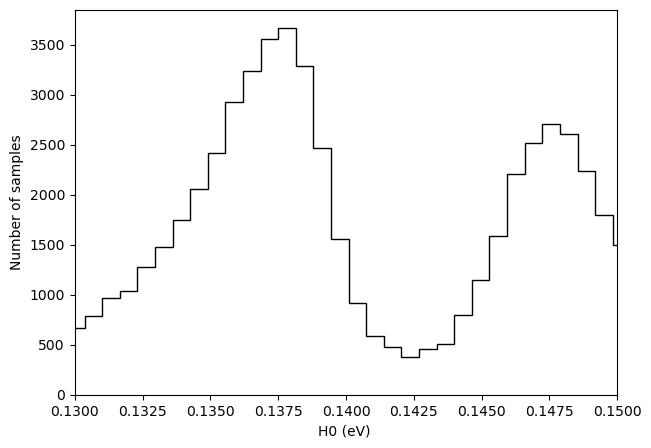

In [46]:
distribution[:,4]
fig, axes = plt.subplots(1, figsize=(7, 5))
axes.hist(distribution[:,4], 100, color="k", histtype="step")
axes.set_xlabel("H0 (eV) ")
axes.set_ylabel("Number of samples")
axes.set_xlim(0.13,0.15)

 true parameter mean [1.3812771518624183, 0.01644400351646571, 0.05469085856283314, 0.10399200237994054, 0.1408080701846673]
 log likelihood [[-221.83949445]]
 true parameter 2 [1.3812771518624183, 0.01644400351646571, 0.05469085856283314, 0.10399200237994054, 0.1375]
 log likelihood [[-227.16375764]]


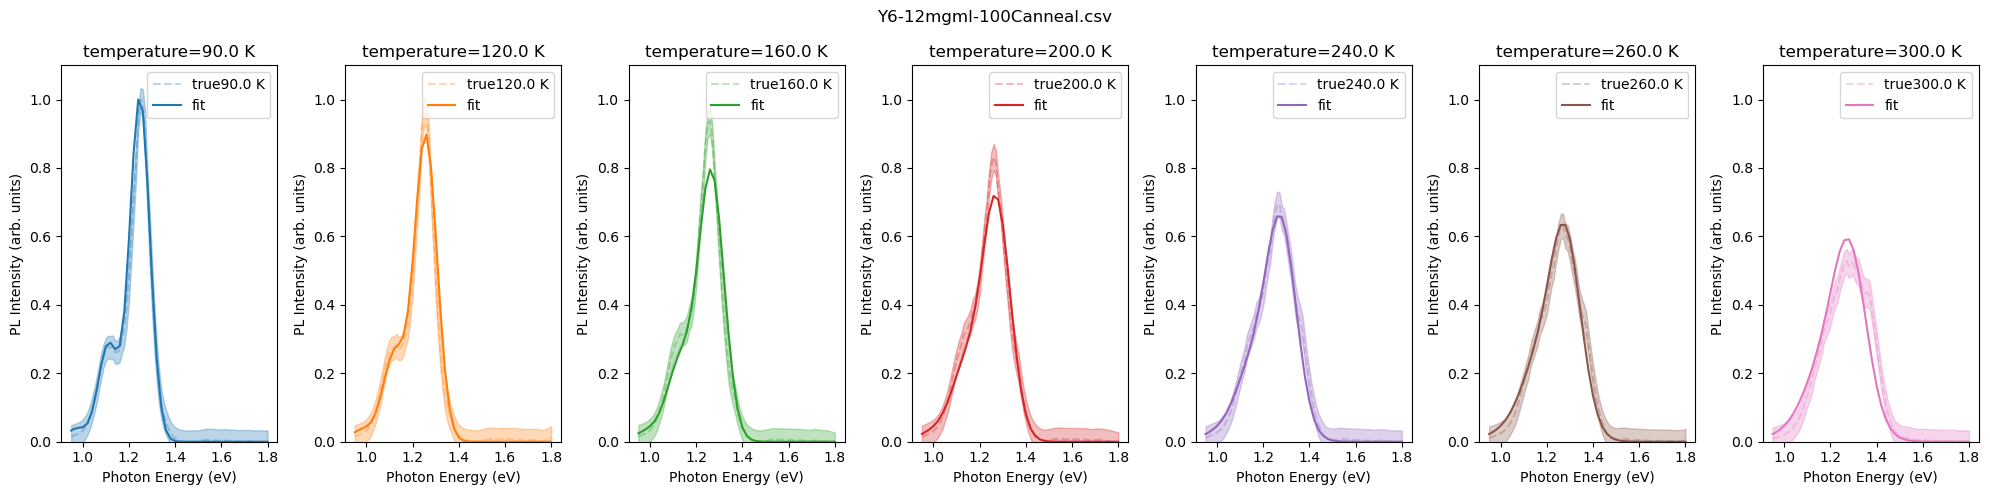

In [47]:
print(' true parameter mean' ,true_parameters)
print(' log likelihood', fit_Pl_exp_EMCEE.pl_loglike( true_parameters, Exp_data, co_var_mat, temperature_list, hws))
true_parameters_2 =true_parameters.copy()
true_parameters_2[4] = 0.1375
print(' true parameter 2' ,true_parameters_2)
print(' log likelihood', fit_Pl_exp_EMCEE.pl_loglike( true_parameters_2, Exp_data, co_var_mat, temperature_list, hws))
truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( true_parameters_2, temperature_list, hws   ) 
truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, save_folder)
fit_Pl_exp_EMCEE.pl_loglike( true_parameters_2, Exp_data, co_var_mat, temperature_list, hws)

for i,axes  in enumerate(ax): 
    axes.plot(hws,truemodel_pl[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
fig.suptitle(csv_name.split('/')[-1])
fig.tight_layout(h_pad=0.0)

In [172]:
tau = reader.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [299.71875327 213.10135106 320.39899386 269.9083632  656.22555437]

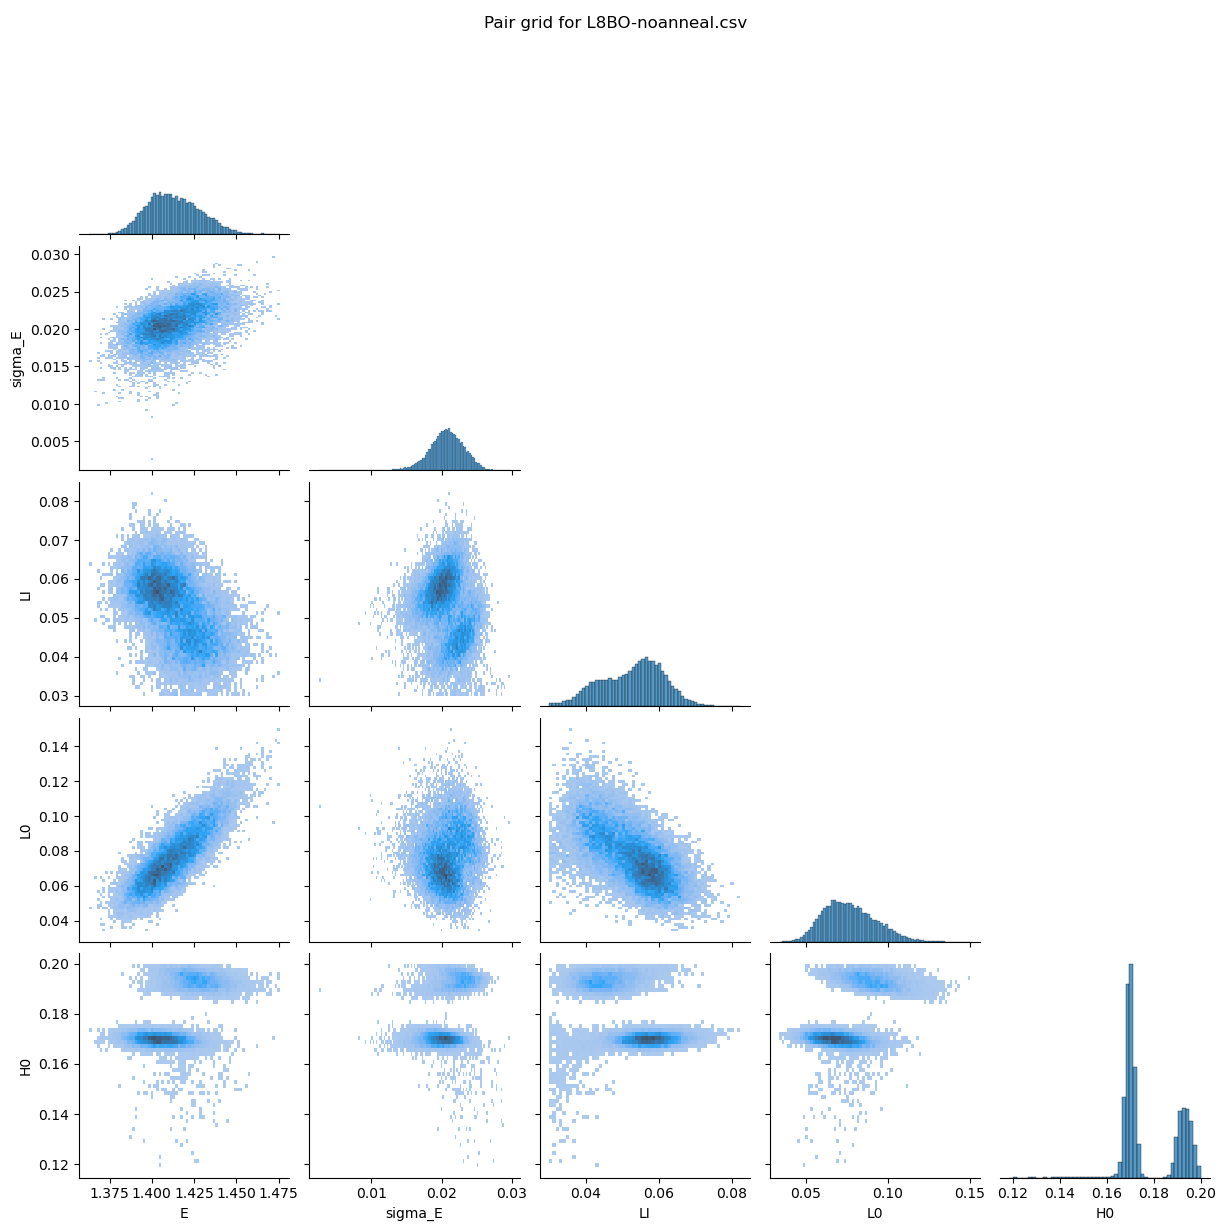

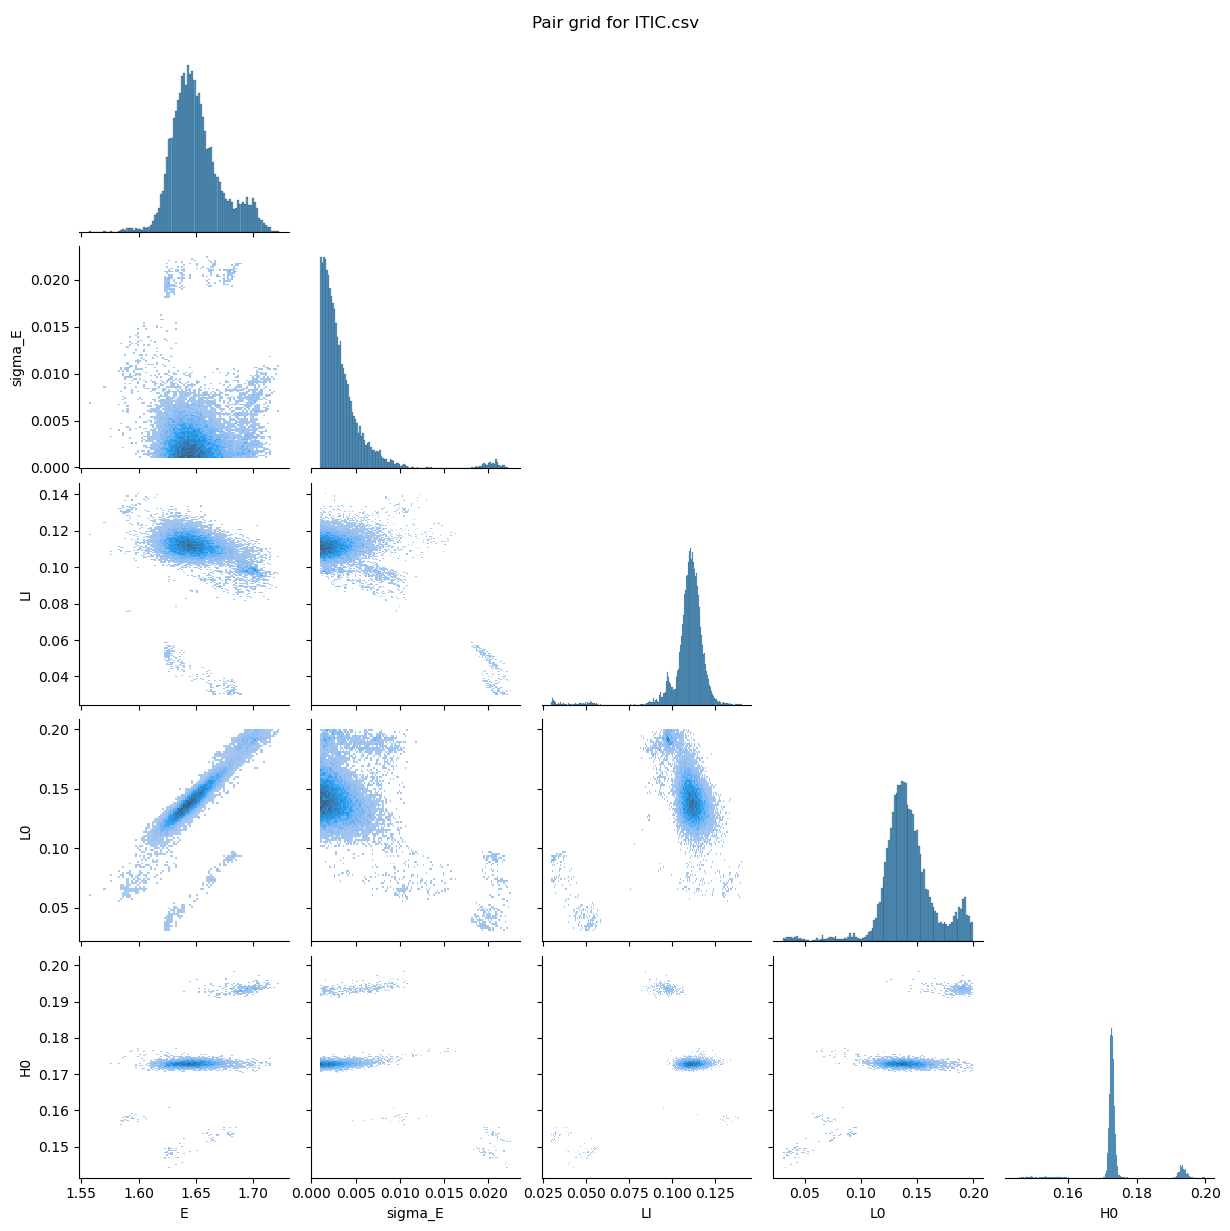

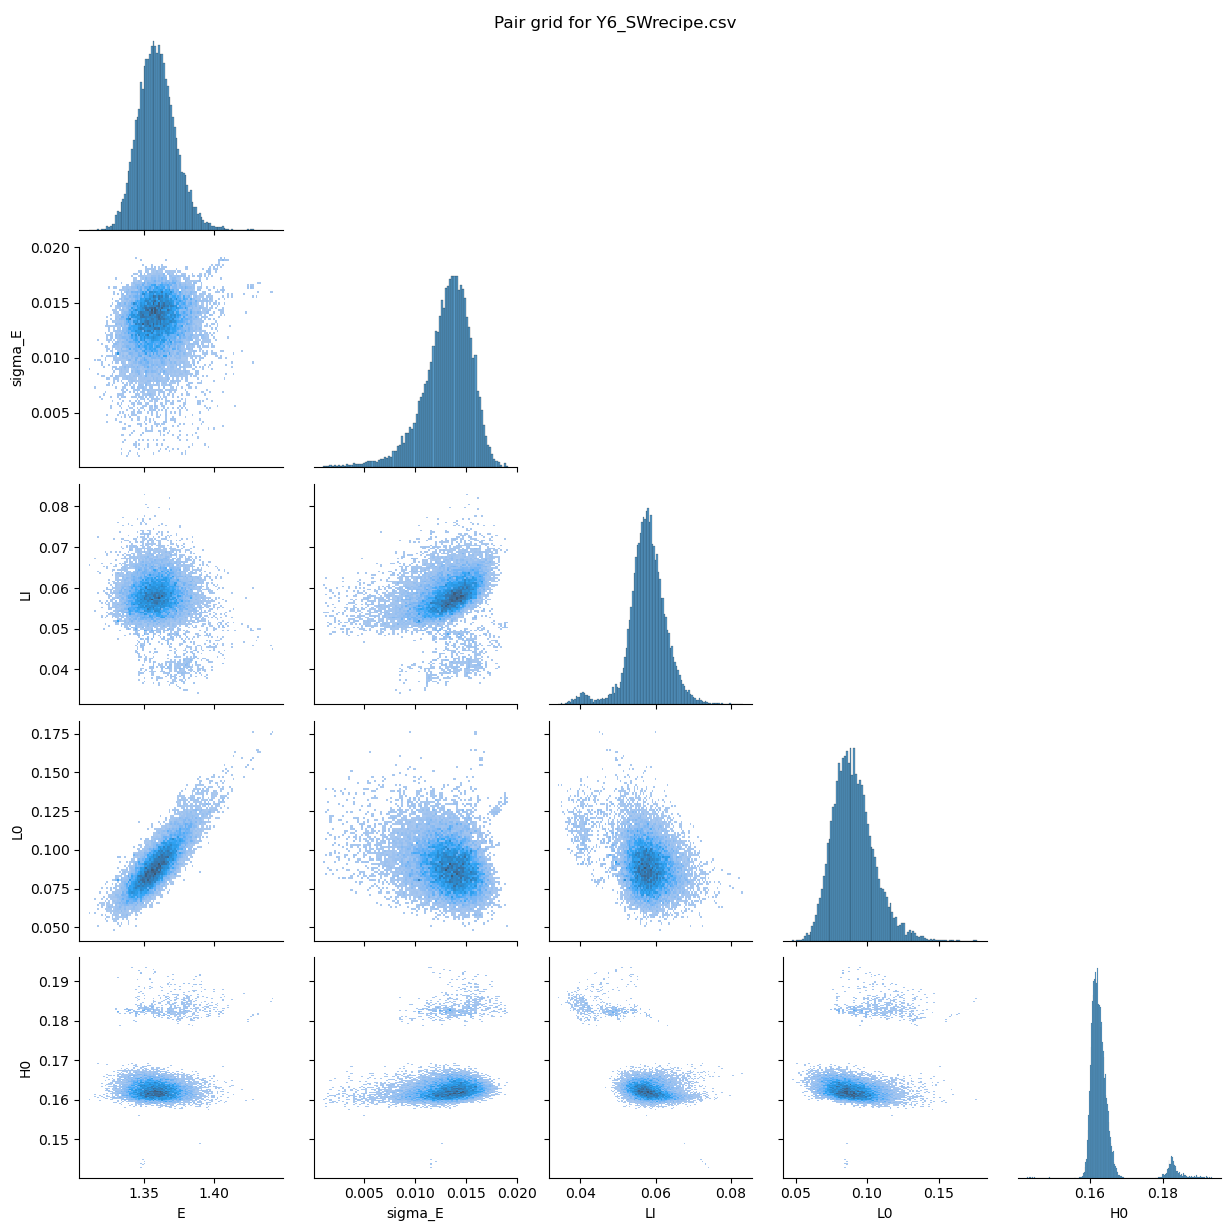

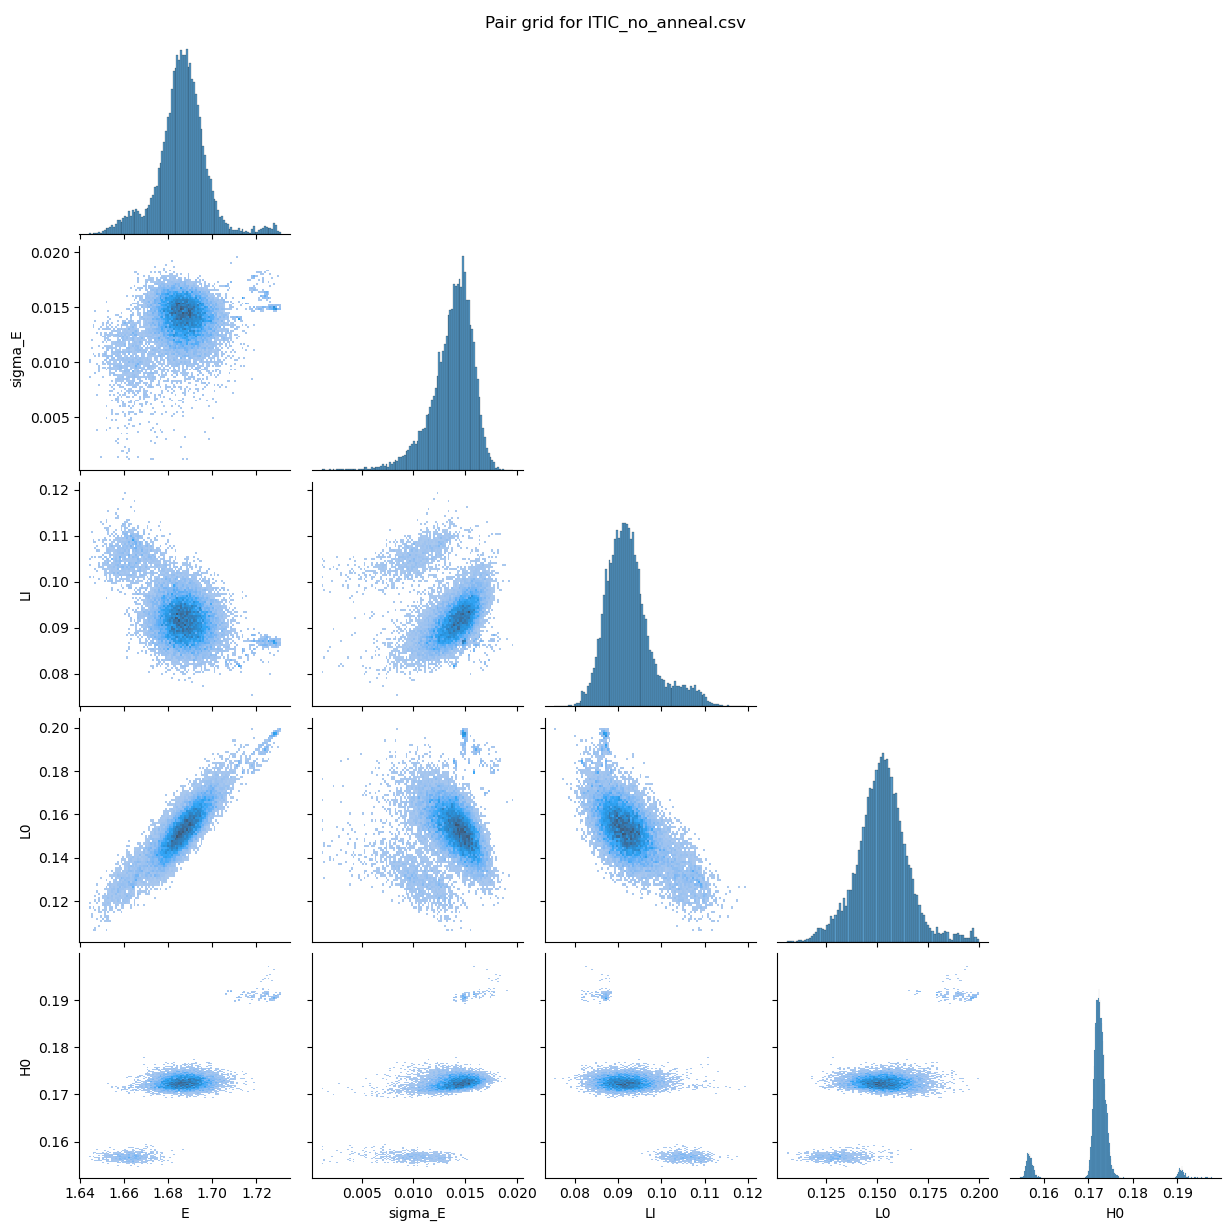

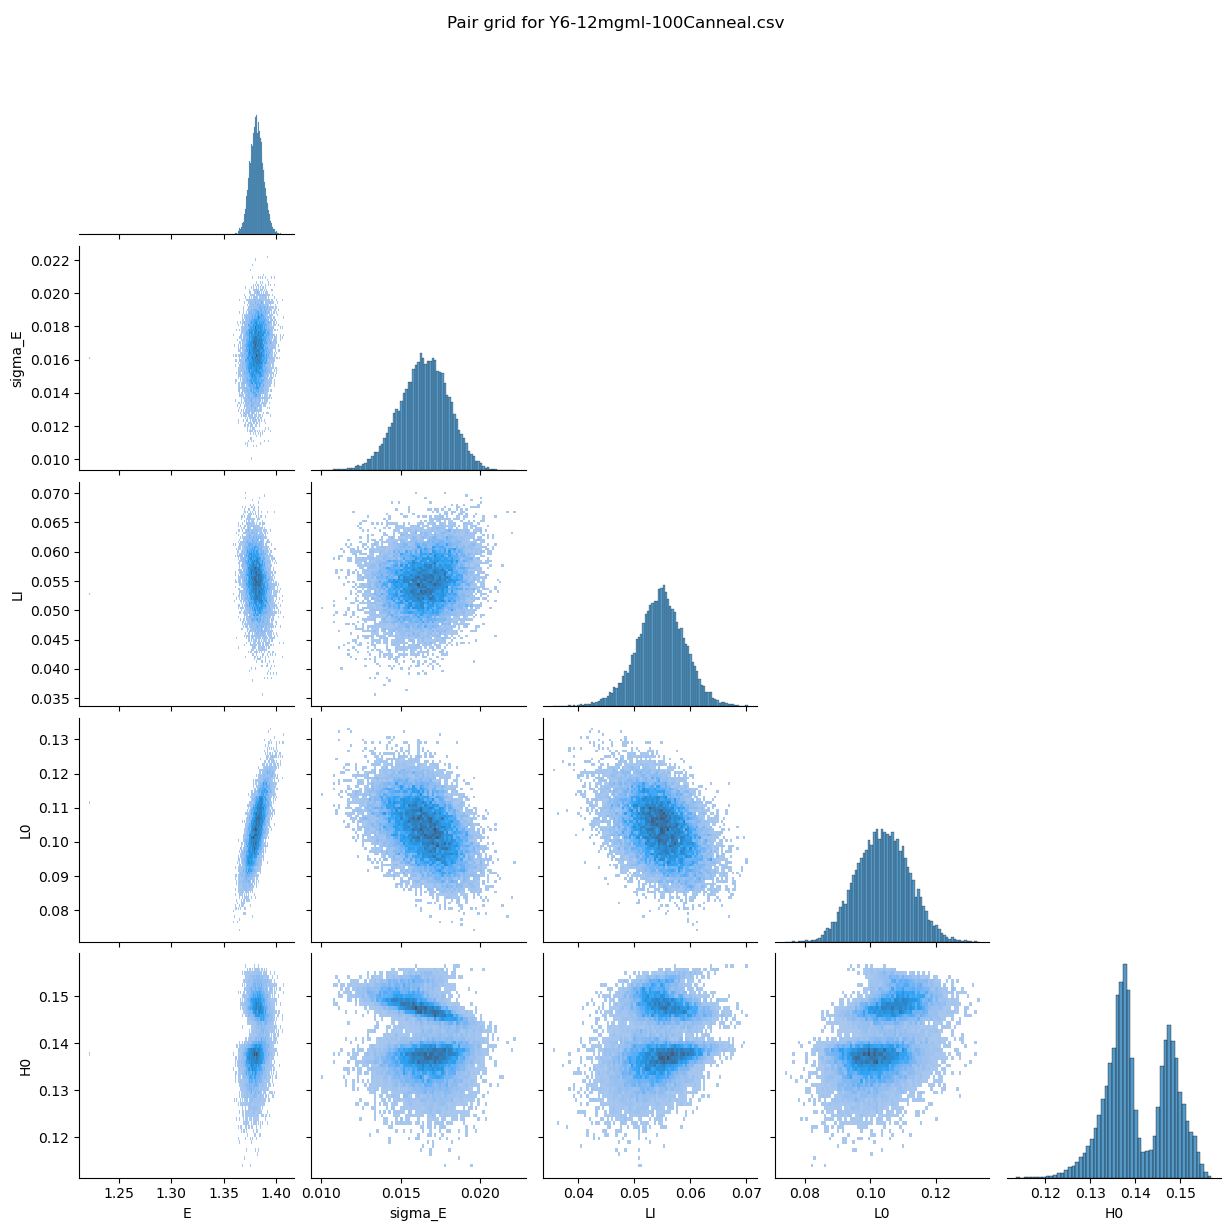

In [49]:
# plot a pair grid plot
import seaborn as sns
#plot posterior predictive

for index in [0,2,6,10,11]:

    filename = df['saved_folder'][index] + "/sampler.h5"
    csv_name = csv_names[df['csv_position'][index]]
    reader = fit_Pl_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
    samples = reader.get_chain(discard=100, thin=15, flat=True)
    df_samples = pd.DataFrame(samples, columns=labels)
    g = sns.pairplot(df_samples, kind="hist", corner=True)
    #g = sns.PairGrid(df,diag_sharey=False, corner=True)
    #g.map_lower(sns.scatterplot)
    #g.map_diag(sns.kdeplot)
    g.fig.suptitle(f"Pair grid for {csv_name.split('/')[-1]}")
    g.fig.show()


experiemental_data/Y6_SWrecipe.csv


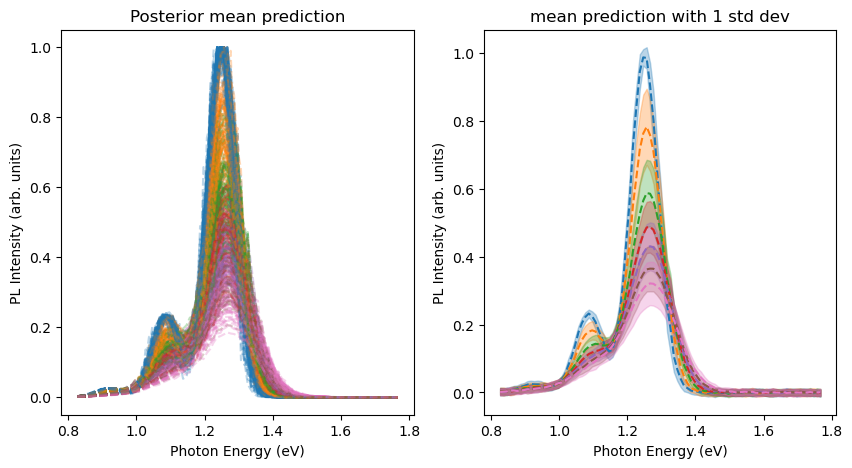

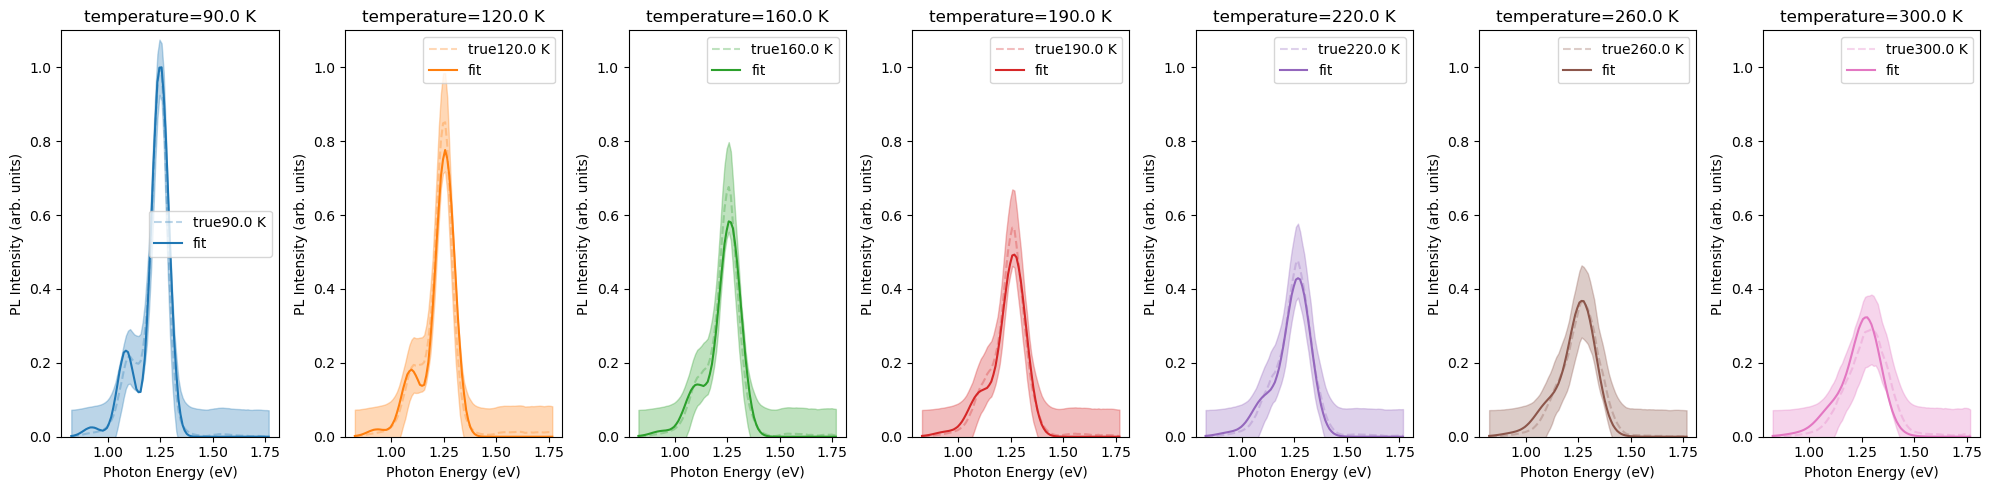

In [140]:
# add noise to the data and plot it now with the fitted parameters
#plot posterior predictive
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
true_parameters=list(np.mean(distribution,axis=0))
truemodel_pl= fit_Pl_exp_EMCEE.pl_trial( true_parameters, temperature_list, hws   ) 
truemodel_pl = truemodel_pl/np.max(truemodel_pl.reshape(-1,1))
co_var_mat = fit_Pl_exp_EMCEE.plot_generated_data( temperature_list, hws, save_folder, model_config, savefig=False, true_parameters=true_parameters)
variance_data = co_var_mat.diagonal().reshape(hws.shape[0],-1).copy()#variance.copy()
fig,ax = Exp_data_utils.plot_pl_data_with_variance(Exp_data, temperature_list, hws, variance_data, save_folder)
for i,axes  in enumerate(ax): 
    axes.plot(hws,truemodel_pl[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)